# Business Understanding

Data is provided by the mashable.com news website between 2013-2014. This data was collected in order to monitor the websites' articles' number of shares along with other aspects of those articles. This is in hopes of learning how best to increase number of shares on an article. These shares are representative of popularity or how much the article is being moved around.

Mashable would likely define a positive outcome by a larger amount of shares of the article. We can measure this outcome using MAE or MAE%.

Mashable may also want to determine the best day of the week or which news category results in the most shares. We would be able to measure this by looking at the ROC Curve.

# Data Understanding

In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings

In [2]:
# store file path
file_path1 = '../Data/ONPClean2.csv' # clean
file_path = '../Data/OnlineNewsPopularity.csv' # unclean

# read in the csv file
df = pd.read_csv(file_path)
df1 = pd.read_csv(file_path1)


# view dataframe
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

## Data Meaning Type

In [3]:
# summary of the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
len(df)

39644

## Data Quality

#### First we split up the url column in the datafram into two features named url_name and date

In [5]:
warnings.filterwarnings('ignore')

# deleting mashable from the beginning of the url and create a new column called url_name
df['url_name'] = df['url'].str.replace('http://mashable.com/', '')
df.head()
df['url_name'].value_counts()

# Remove the date part at the beginning of each row in 'url_name' column
df['url_name'] = df['url_name'].str.replace(r'^\d+/\d+/\d+/', '')
# Display the updated DataFrame
df.head()

# Extract the date part from the 'URL' column using regular expressions
df['date'] = df['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')

# Display the 'date' column
# print(df['date'])
df.head()
other_columns = [col for col in df.columns if col not in ['url_name', 'date']]
# Specify the desired column order
column_order = ['url_name', 'date'] + other_columns
# Reorder the columns in the DataFrame
df = df[column_order]

# Remove leading whitespaces from column names
df = df.rename(columns=lambda x: x.strip())

# Display the DataFrame with 'url_name' and 'date' first
df.head()
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Now, when you use df.head(), it will display all columns
df.head()

url_name        date  \
0    amazon-instant-video-browser/  2013/01/07   
1     ap-samsung-sponsored-tweets/  2013/01/07   
2  apple-40-billion-app-downloads/  2013/01/07   
3        astronaut-notre-dame-bcs/  2013/01/07   
4                att-u-verse-apps/  2013/01/07   

                                                 url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                  496.000000                1.0                 0.0   
1                    

In [6]:
# check for any missing data
df.isna().sum()

url_name                        0
date                            0
url                             0
timedelta                       0
n_tokens_title                  0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 63, dtype: int64

#### Lets change the column date into the proper format datetime and re-order the dataframe in ascending order

In [7]:
# Lets change the column date into the proper format datetime
# and re-order the dataframe in ascending order

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Now, the 'date' column is in datetime format and sortable
# You can change the data type to 'object' if needed
df['date'] = df['date'].dt.strftime('%Y/%m/%d')

# Sort the DataFrame in ascending order based on the 'date' column
df = df.sort_values(by='date', ascending=True)

# Display the sorted DataFrame
df.head()

# confirm types
df.dtypes

url_name                         object
date                             object
url                              object
timedelta                       float64
n_tokens_title                  float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 63, dtype: object

#### Combining all one hot encoded columns for day of the week into one column called day_of_week - it will be categorical

In [8]:
# Change the data type of the columns to 'object'
df['weekday_is_monday']=df['weekday_is_monday'].astype('category')
df['weekday_is_tuesday']=df['weekday_is_tuesday'].astype('category')
df['weekday_is_wednesday']=df['weekday_is_wednesday'].astype('category')
df['weekday_is_thursday']=df['weekday_is_thursday'].astype('category')
df['weekday_is_friday']=df['weekday_is_friday'].astype('category')
df['weekday_is_saturday']=df['weekday_is_saturday'].astype('category')
df['weekday_is_sunday']=df['weekday_is_sunday'].astype('category')

columns_to_convert = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

for column in columns_to_convert:
    df[column] = df[column].astype('category')
    
# # Define a function to map values to day of the week
def map_to_day(row):
    if row['weekday_is_monday'] == 1:
        return 'Monday'
    elif row['weekday_is_tuesday'] == 1:
        return 'Tuesday'
    elif row['weekday_is_wednesday'] == 1:
        return 'Wednesday'
    elif row['weekday_is_thursday'] == 1:
        return 'Thursday'
    elif row['weekday_is_friday'] == 1:
        return 'Friday'
    elif row['weekday_is_saturday'] == 1:
        return 'Saturday'
    elif row['weekday_is_sunday'] == 1:
        return 'Sunday'
    else:
        return None
    return None  # Return None for rows with no day selected

# Apply the function to each row and create a new column 'day'
df['day_of_week'] = df.apply(map_to_day, axis=1)

df.head()

print(df)

                                   url_name        date  \
0             amazon-instant-video-browser/  2013/01/07   
57                          reeddit-reddit/  2013/01/07   
56                       rage-comics-dying/  2013/01/07   
55     power-matters-alliance-organization/  2013/01/07   
54                 polaroid-android-camera/  2013/01/07   
...                                     ...         ...   
39626                  christmas-tree-bugs/  2014/12/27   
39625        als-ice-bucket-challenge-swim/  2014/12/27   
39624               air-asia-flight-qz8501/  2014/12/27   
39632                  las-vegas-new-years/  2014/12/27   
39643                youtube-channels-2015/  2014/12/27   

                                                     url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
57        http://mashable.com/2013/01/07/reeddit-reddit/      731.0   
56     http://mashable.com/2013/01/07/rage-comics-dying/      731.0   
55     

#### Data channels moved to one categorical column - news_category 
-- another possible response variable for classification model

In [9]:
# Change the data type of the columns to 'object'
df['data_channel_is_lifestyle']=df['data_channel_is_lifestyle'].astype('category')
df['data_channel_is_entertainment']=df['data_channel_is_entertainment'].astype('category')
df['data_channel_is_bus']=df['data_channel_is_bus'].astype('category')
df['data_channel_is_socmed']=df['data_channel_is_socmed'].astype('category')
df['data_channel_is_tech']=df['data_channel_is_tech'].astype('category')
df['data_channel_is_world']=df['data_channel_is_world'].astype('category')

columns_to_convert_channel = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
    'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

for column in columns_to_convert_channel:
    df[column] = df[column].astype('category')
    
# # Define a function to map values to day of the week
def map_to_day(row):
    if row['data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social_Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Tech'
    elif row['data_channel_is_world'] == 1:
        return 'World_News'
    else:
        return 'Uncategorized'

# Apply the function to each row and create a new column 'news_category'
df['news_category'] = df.apply(map_to_day, axis=1)

df.head()

url_name        date  \
0          amazon-instant-video-browser/  2013/01/07   
57                       reeddit-reddit/  2013/01/07   
56                    rage-comics-dying/  2013/01/07   
55  power-matters-alliance-organization/  2013/01/07   
54              polaroid-android-camera/  2013/01/07   

                                                  url  timedelta  \
0   http://mashable.com/2013/01/07/amazon-instant-...      731.0   
57     http://mashable.com/2013/01/07/reeddit-reddit/      731.0   
56  http://mashable.com/2013/01/07/rage-comics-dying/      731.0   
55  http://mashable.com/2013/01/07/power-matters-a...      731.0   
54  http://mashable.com/2013/01/07/polaroid-androi...      731.0   

    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             12.0             219.0         0.663594               1.0   
57             8.0             130.0         0.821705               1.0   
56             9.0             474.0         0.608602               1.0   
55            10.0             555.0         0.535390               1.0   
54             9.0            1115.0         0.424132               1.0   

    n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                   0.815385        4.0             2.0       1.0         0.0   
57                  0.922078        7.0             4.0       0.0         0.0   
56                  0.802158       11.0             0.0       1.0         0.0   
55                  0.708824        7.0             6.0       1.0         0.0   
54                  0.564539       21.0            21.0      20.0         0.0   

    average_token_length  num_keywords data_channel_is_lifestyle  \
0               4.680365           5.0                       0.0   
57              4.546154           9.0                       0.0   
56              4.759494           7.0                       0.0   
55              5.147748          10.0                       0.0   
54              4.631390           8.0                       0.0   

   data_channel_is_entertainment data_channel_is_bus data_channel_is_socmed  \
0                            1.0                 0.0                    0.0   
57                           0.0                 0.0                    0.0   
56                           0.0                 0.0                    0.0   
55                           0.0                 0.0                    0.0   
54                           0.0                 0.0                    0.0   

   data_channel_is_tech data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                   0.0         0.0         0.0   
57                  1.0                   0.0         0.0         0.0   
56                  0.0                   0.0         0.0         0.0   
55                  1.0                   0.0         0.0         0.0   
54                  1.0                   0.0         0.0         0.0   

    kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0          0.0         0.0         0.0         0.0         0.0         0.0   
57         0.0         0.0         0.0         0.0         0.0         0.0   
56         0.0         0.0         0.0         0.0         0.0         0.0   
55         0.0         0.0         0.0         0.0         0.0         0.0   
54         0.0         0.0         0.0         0.0         0.0         0.0   

    kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0          0.0                      496.0                      496.0   
57         0.0                     1300.0                     1300.0   
56         0.0                        0.0                        0.0   
55         0.0                     1900.0                     1900.0   
54         0.0                      545.0                    16000.0   

    self_reference_avg_sharess weekday_is_monday weekday_is_tuesday  \
0                        496.0               1.0    

In [10]:
print(df['news_category'].value_counts())

World_News       8427
Tech             7346
Entertainment    7057
Business         6258
Uncategorized    6134
Social_Media     2323
Lifestyle        2099
Name: news_category, dtype: int64


#### Take date column and break it down into two more columns date and year for additional categorical variables.

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

url_name       date  \
0          amazon-instant-video-browser/ 2013-01-07   
57                       reeddit-reddit/ 2013-01-07   
56                    rage-comics-dying/ 2013-01-07   
55  power-matters-alliance-organization/ 2013-01-07   
54              polaroid-android-camera/ 2013-01-07   

                                                  url  timedelta  \
0   http://mashable.com/2013/01/07/amazon-instant-...      731.0   
57     http://mashable.com/2013/01/07/reeddit-reddit/      731.0   
56  http://mashable.com/2013/01/07/rage-comics-dying/      731.0   
55  http://mashable.com/2013/01/07/power-matters-a...      731.0   
54  http://mashable.com/2013/01/07/polaroid-androi...      731.0   

    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             12.0             219.0         0.663594               1.0   
57             8.0             130.0         0.821705               1.0   
56             9.0             474.0         0.608602               1.0   
55            10.0             555.0         0.535390               1.0   
54             9.0            1115.0         0.424132               1.0   

    n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                   0.815385        4.0             2.0       1.0         0.0   
57                  0.922078        7.0             4.0       0.0         0.0   
56                  0.802158       11.0             0.0       1.0         0.0   
55                  0.708824        7.0             6.0       1.0         0.0   
54                  0.564539       21.0            21.0      20.0         0.0   

    average_token_length  num_keywords data_channel_is_lifestyle  \
0               4.680365           5.0                       0.0   
57              4.546154           9.0                       0.0   
56              4.759494           7.0                       0.0   
55              5.147748          10.0                       0.0   
54              4.631390           8.0                       0.0   

   data_channel_is_entertainment data_channel_is_bus data_channel_is_socmed  \
0                            1.0                 0.0                    0.0   
57                           0.0                 0.0                    0.0   
56                           0.0                 0.0                    0.0   
55                           0.0                 0.0                    0.0   
54                           0.0                 0.0                    0.0   

   data_channel_is_tech data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                   0.0         0.0         0.0   
57                  1.0                   0.0         0.0         0.0   
56                  0.0                   0.0         0.0         0.0   
55                  1.0                   0.0         0.0         0.0   
54                  1.0                   0.0         0.0         0.0   

    kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0          0.0         0.0         0.0         0.0         0.0         0.0   
57         0.0         0.0         0.0         0.0         0.0         0.0   
56         0.0         0.0         0.0         0.0         0.0         0.0   
55         0.0         0.0         0.0         0.0         0.0         0.0   
54         0.0         0.0         0.0         0.0         0.0         0.0   

    kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0          0.0                      496.0                      496.0   
57         0.0                     1300.0                     1300.0   
56         0.0                        0.0                        0.0   
55         0.0                     1900.0                     1900.0   
54         0.0                      545.0                    16000.0   

    self_reference_avg_sharess weekday_is_monday weekday_is_tuesday  \
0                        496.0               1.0          

### Histograms

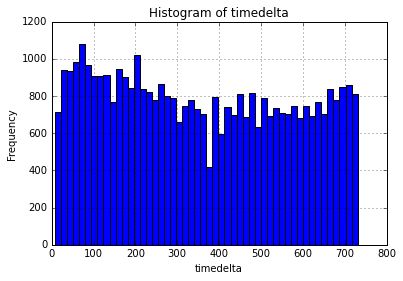

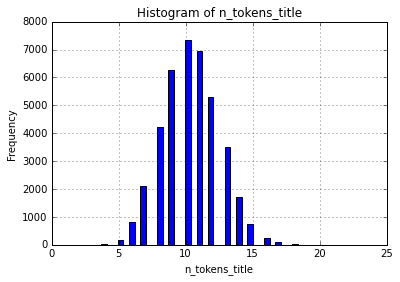

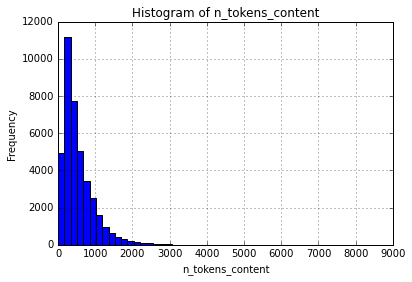

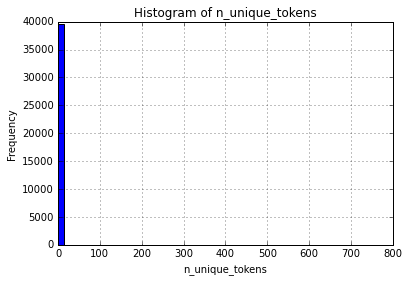

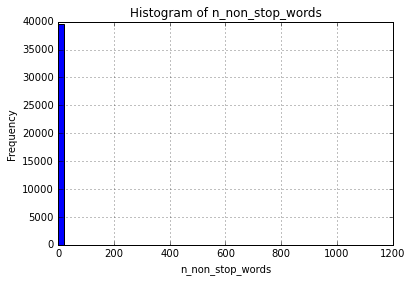

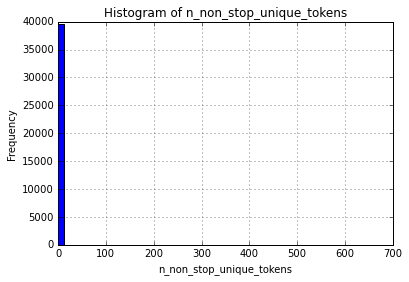

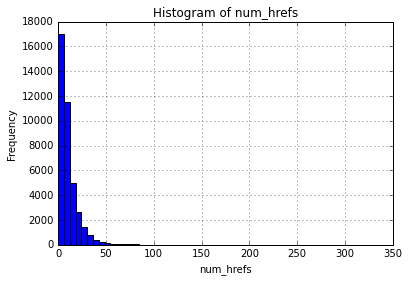

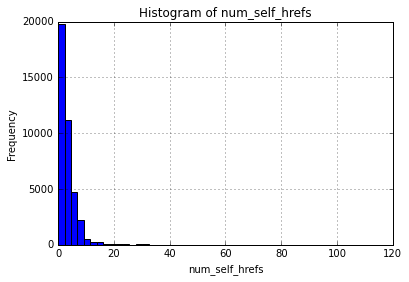

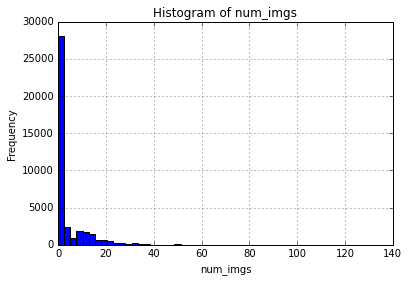

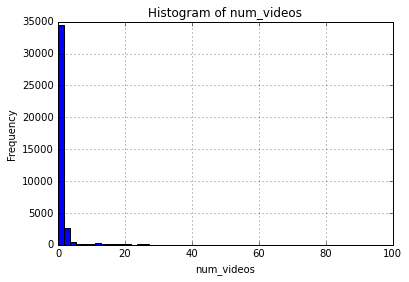

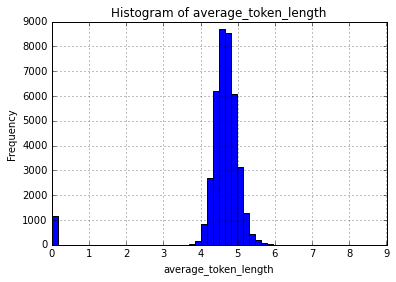

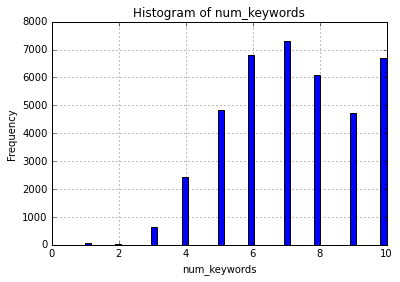

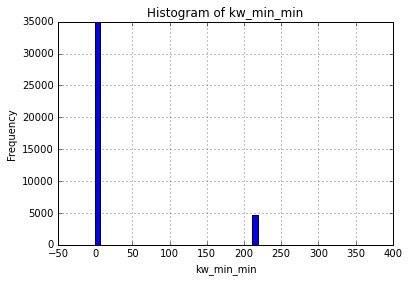

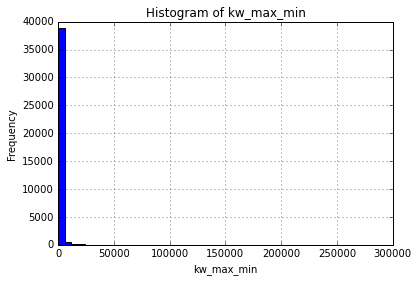

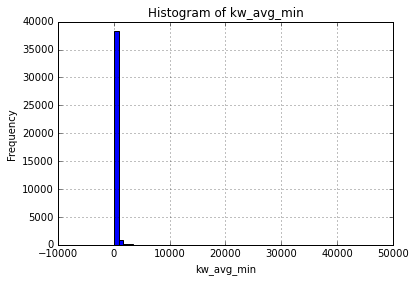

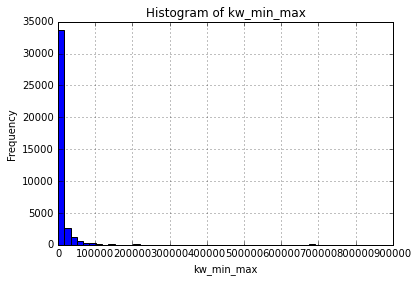

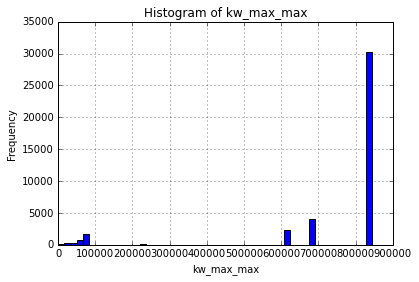

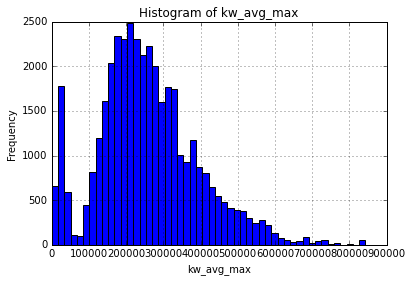

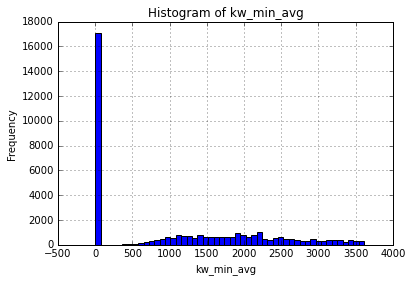

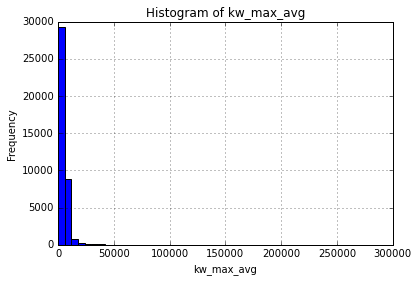

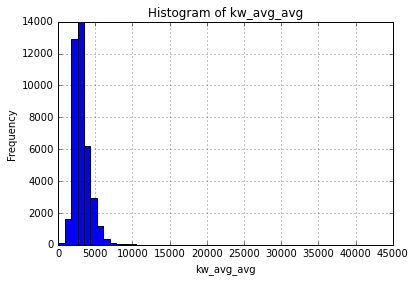

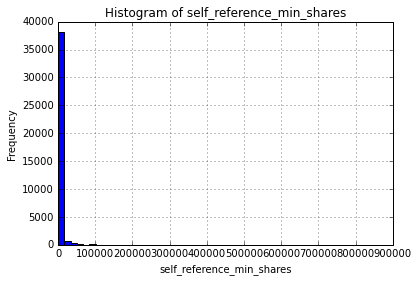

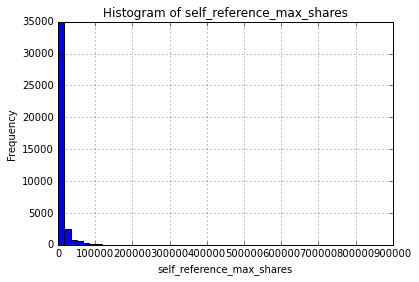

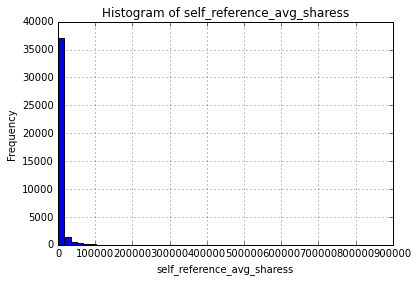

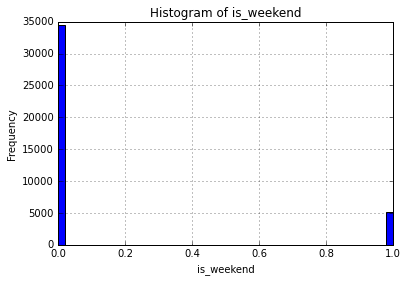

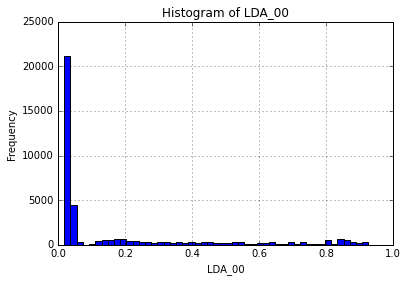

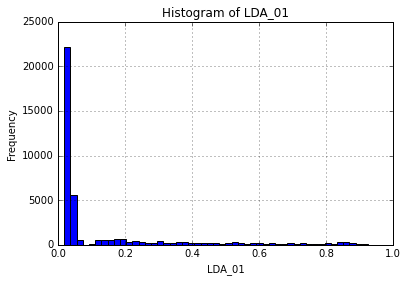

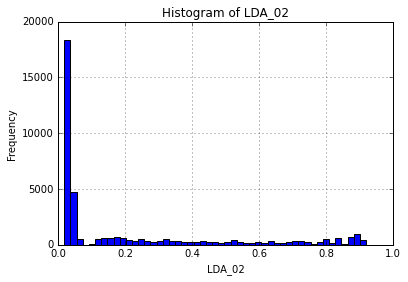

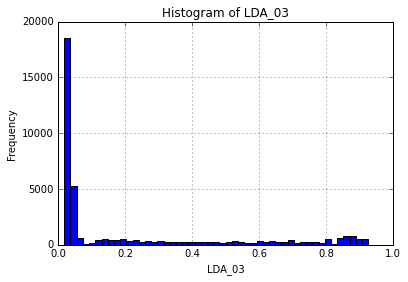

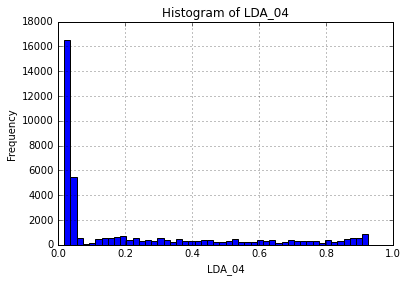

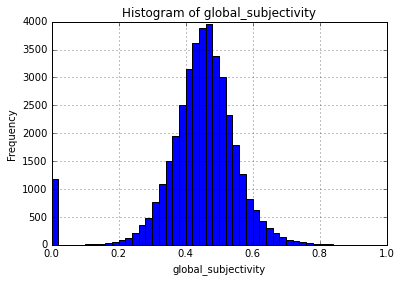

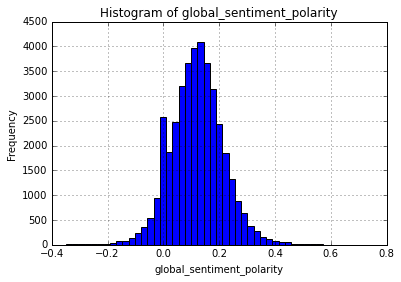

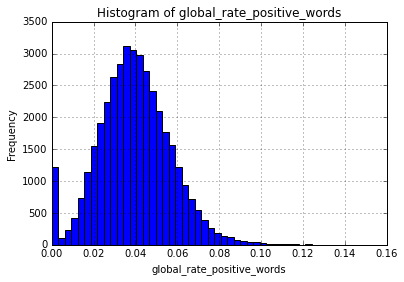

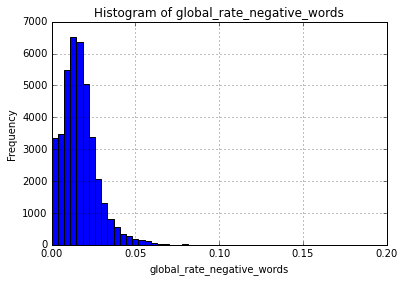

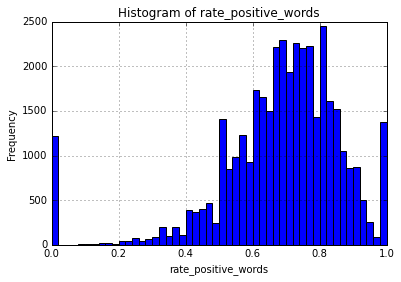

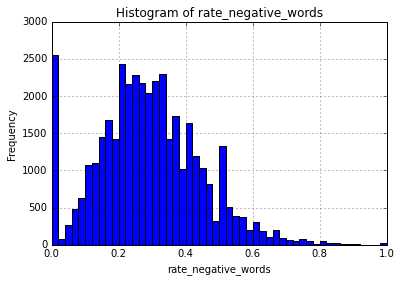

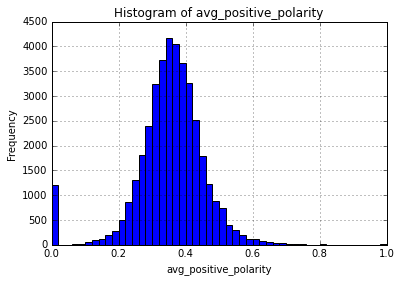

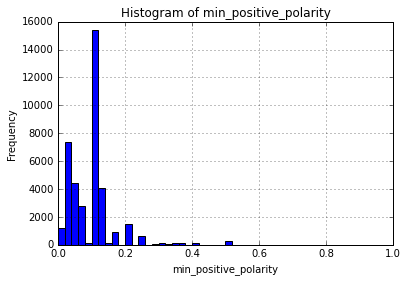

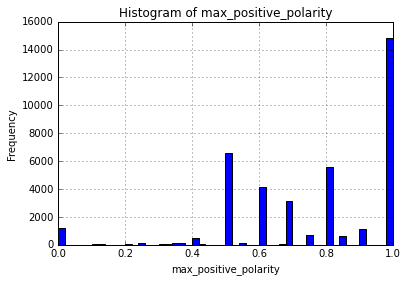

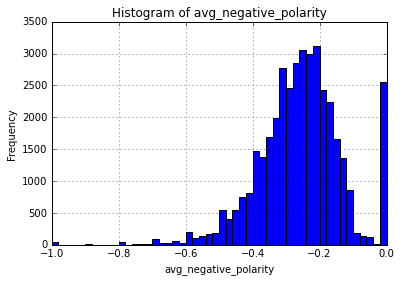

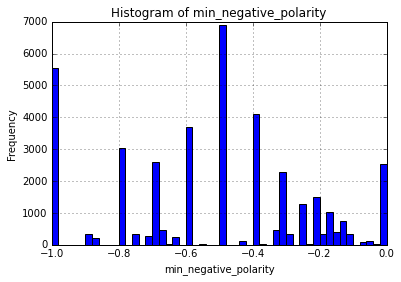

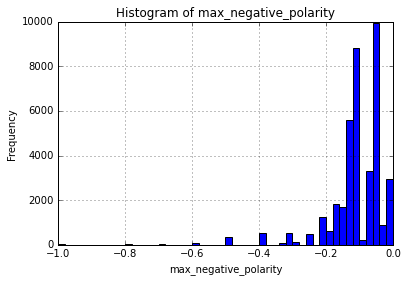

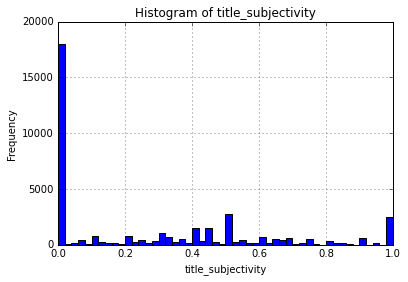

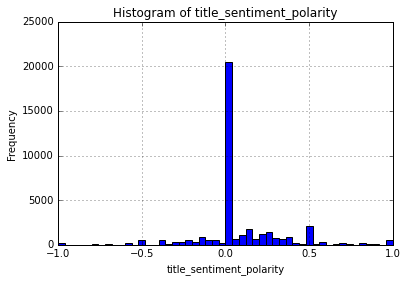

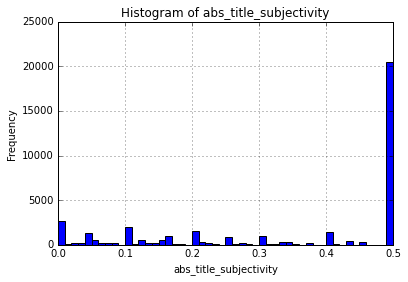

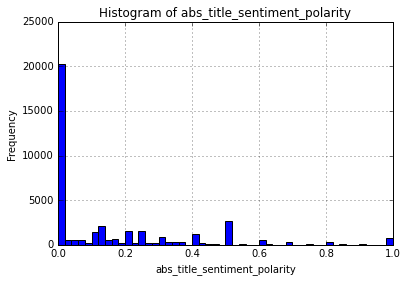

In [12]:
# Loop through all continous varaible columns get their frequency counts

# Assuming df is your DataFrame with the continuous variables
continuous_columns = df.select_dtypes(include=['float64']).columns

for column in continuous_columns:
    plt.hist(df[column], bins=50, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

#### Log transformations
It was decided to log transform quite a few of the columns in order to better understand the information being presented.

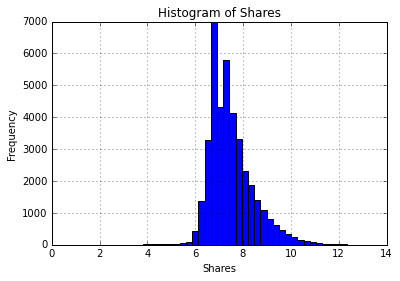

In [13]:
# Shares - log transform 
# shares looks like a variable that can be log transformed to be more normally distributed 
# For regression our continous variable will be shares
df['log_shares'] = np.log1p(df['shares'])
plt.hist(df['log_shares'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Histogram of Shares')
plt.grid(True)
plt.show()

# it looks more normally distributed

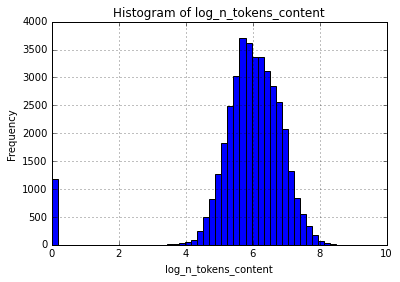

In [14]:
# n_tokens_content - log transformation
df['log_n_tokens_content'] = np.log1p(df['n_tokens_content'])
plt.hist(df['log_n_tokens_content'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_n_tokens_content')
plt.ylabel('Frequency')
plt.title('Histogram of log_n_tokens_content')
plt.grid(True)
plt.show()

# it looks more normally distributed
# there is a number of low-value outliers present in this variable

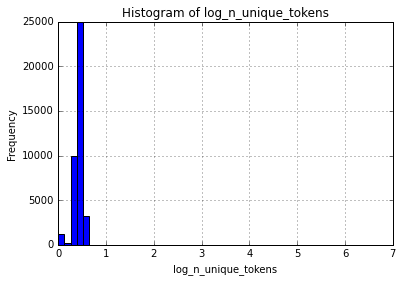

In [15]:
# n_unique_tokens - log transformed 
df['log_n_unique_tokens'] = np.log1p(df['n_unique_tokens'])
plt.hist(df['log_n_unique_tokens'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_n_unique_tokens')
plt.ylabel('Frequency')
plt.title('Histogram of log_n_unique_tokens')
plt.grid(True)
plt.show()

# still very right skewed but is easier to interpret distribution of frequency

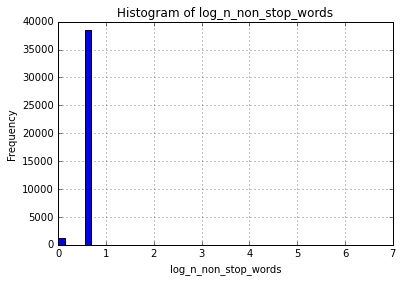

In [16]:
# n_non_stop_words - log transformed 
df['log_n_non_stop_words'] = np.log1p(df['n_non_stop_words'])
plt.hist(df['log_n_non_stop_words'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_n_non_stop_words')
plt.ylabel('Frequency')
plt.title('Histogram of log_n_non_stop_words')
plt.grid(True)
plt.show()

# not much of a change
# could be dropped

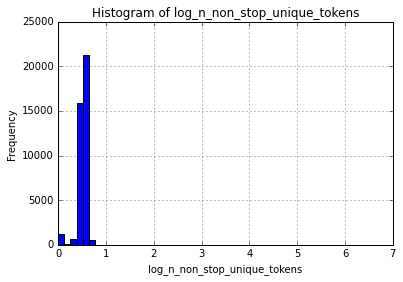

In [17]:
# n_non_stop_unique_tokens - log transformed  
df['log_n_non_stop_unique_tokens'] = np.log1p(df['n_non_stop_unique_tokens'])
plt.hist(df['log_n_non_stop_unique_tokens'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_n_non_stop_unique_tokens')
plt.ylabel('Frequency')
plt.title('Histogram of log_n_non_stop_unique_tokens')
plt.grid(True)
plt.show()

# still very right skewed but is easier to interpret distribution of frequency

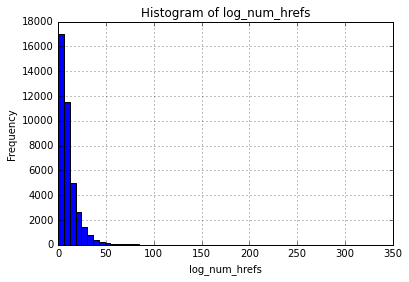

In [18]:
# num_hrefs - log transform
df['log_num_hrefs'] = np.log1p(df['num_hrefs'])
plt.hist(df['num_hrefs'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_hrefs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_hrefs')
plt.grid(True)
plt.show()

# still very right skewed but is easier to interpret distribution of frequency

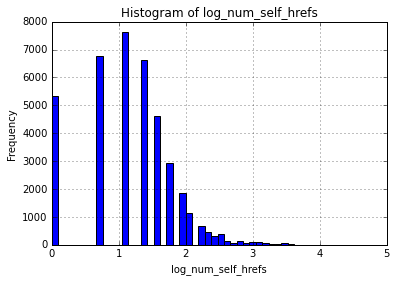

In [19]:
# num_self_hrefs - log transform
df['log_num_self_hrefs'] = np.log1p(df['num_self_hrefs'])
plt.hist(df['log_num_self_hrefs'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_self_hrefs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_self_hrefs')
plt.grid(True)
plt.show()

# still right skewed but is much easier to interpret distribution of frequency than before.

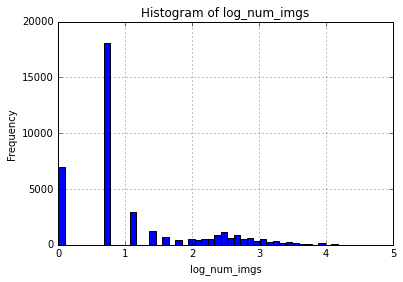

In [20]:
# num_imgs - log transform
df['log_num_imgs'] = np.log1p(df['num_imgs'])
plt.hist(df['log_num_imgs'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_imgs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_imgs')
plt.grid(True)
plt.show()

# still very right skewed but is easier to interpret distribution of frequency

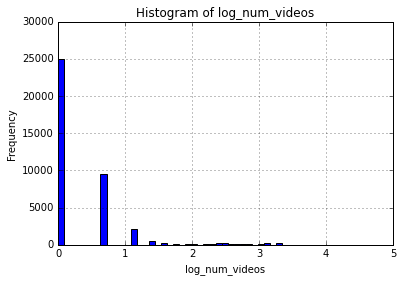

In [21]:
# num_videos - log transform
df['log_num_videos'] = np.log1p(df['num_videos'])
plt.hist(df['log_num_videos'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_videos')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_videos')
plt.grid(True)
plt.show()

# still very right skewed but is easier to interpret distribution of frequency
# still a large amount of low-values.

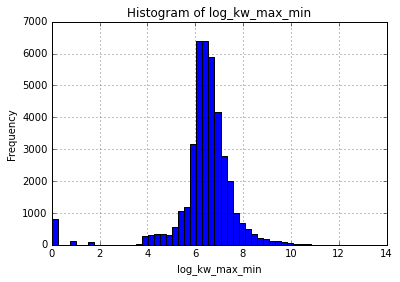

In [22]:
# kw_max_min - log transform
df['log_kw_max_min'] = np.log1p(df['kw_max_min'])
plt.hist(df['log_kw_max_min'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_max_min')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_max_min')
plt.grid(True)
plt.show()

# much more normally disstributed
# some low-value outliers are present

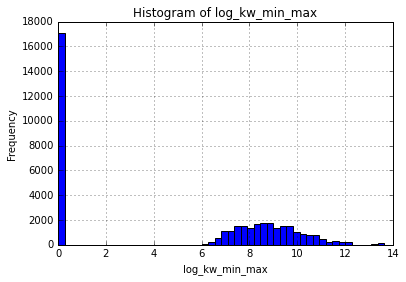

In [23]:
# kw_min_max - log transform
df['log_kw_min_max'] = np.log1p(df['kw_min_max'])
plt.hist(df['log_kw_min_max'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_min_max')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_min_max')
plt.grid(True)
plt.show()

# easier to interpret
# a lot of low-values are skewing the graph to the right

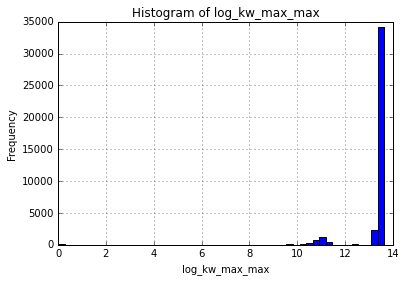

In [24]:
# kw_max_max - log transform
df['log_kw_max_max'] = np.log1p(df['kw_max_max'])
plt.hist(df['log_kw_max_max'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_max_max')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_max_max')
plt.grid(True)
plt.show()

# easier to interpret
# there is a large amount of high-values in this variable

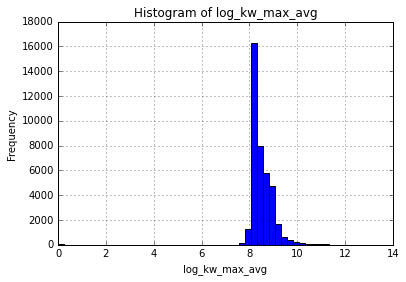

In [25]:
# kw_max_avg - log transform
df['log_kw_max_avg'] = np.log1p(df['kw_max_avg'])
plt.hist(df['log_kw_max_avg'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_max_avg')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_max_avg')
plt.grid(True)
plt.show()

# more normally distributed with some skewing 

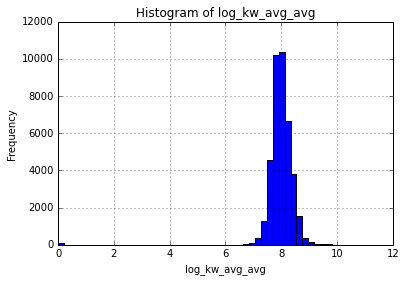

In [26]:
# kw_avg_avg - log transform
df['log_kw_avg_avg'] = np.log1p(df['kw_avg_avg'])
plt.hist(df['log_kw_avg_avg'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_avg_avg')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_avg_avg')
plt.grid(True)
plt.show()

# more normally distributed 

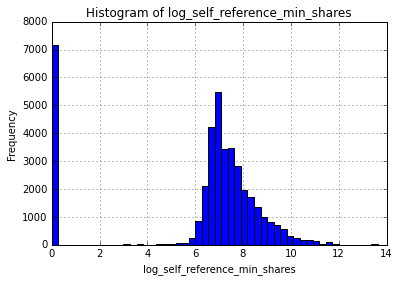

In [27]:
# self_reference_min_shares - log transform
df['log_self_reference_min_shares'] = np.log1p(df['self_reference_min_shares'])
plt.hist(df['log_self_reference_min_shares'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_self_reference_min_shares')
plt.ylabel('Frequency')
plt.title('Histogram of log_self_reference_min_shares')
plt.grid(True)
plt.show()

# more normally distributed
# large number of low-value outliers present

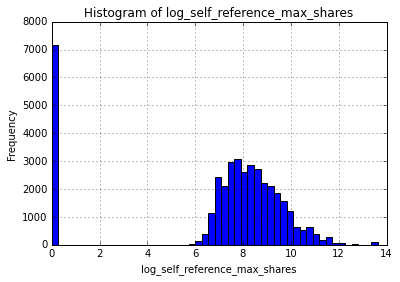

In [28]:
# self_reference_max_shares - log transform
df['log_self_reference_max_shares'] = np.log1p(df['self_reference_max_shares'])
plt.hist(df['log_self_reference_max_shares'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_self_reference_max_shares')
plt.ylabel('Frequency')
plt.title('Histogram of log_self_reference_max_shares')
plt.grid(True)
plt.show()

# more normally distributed
# large number of low-value outliers present

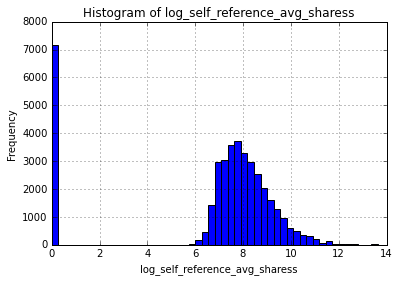

In [29]:
# self_reference_avg_sharess - log transform
df['log_self_reference_avg_sharess'] = np.log1p(df['self_reference_avg_sharess'])
plt.hist(df['log_self_reference_avg_sharess'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_self_reference_avg_sharess')
plt.ylabel('Frequency')
plt.title('Histogram of log_self_reference_avg_sharess')
plt.grid(True)
plt.show()

# more normally distributed
# large number of low-value outliers present

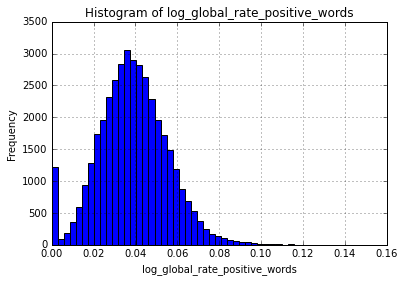

In [30]:
# global_rate_positive_words - log transform
df['log_global_rate_positive_words'] = np.log1p(df['global_rate_positive_words'])
plt.hist(df['log_global_rate_positive_words'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_global_rate_positive_words')
plt.ylabel('Frequency')
plt.title('Histogram of log_global_rate_positive_words')
plt.grid(True)
plt.show()

# more normally distributed but still right skewed
# large number of low-value outliers present

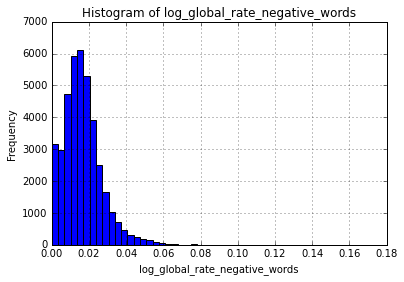

In [31]:
# global_rate_negative_words - log transform
df['log_global_rate_negative_words'] = np.log1p(df['global_rate_negative_words'])
plt.hist(df['log_global_rate_negative_words'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_global_rate_negative_words')
plt.ylabel('Frequency')
plt.title('Histogram of log_global_rate_negative_words')
plt.grid(True)
plt.show()

# still very right skewed but the data is more interpretable

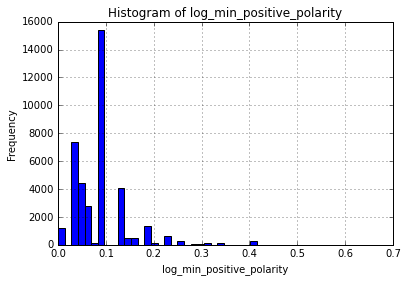

In [32]:
# min_positive_polarity - log transform
df['log_min_positive_polarity'] = np.log1p(df['min_positive_polarity'])
plt.hist(df['log_min_positive_polarity'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_min_positive_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of log_min_positive_polarity')
plt.grid(True)
plt.show()

# still right skewed with more interpretaion of data
# larger frequency of lower values

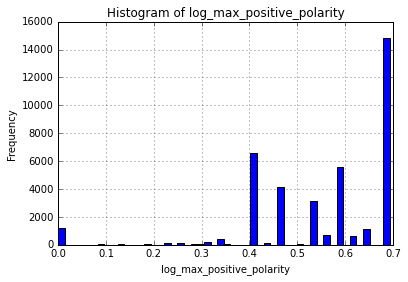

In [33]:
# max_positive_polarity - log transform
df['log_max_positive_polarity'] = np.log1p(df['max_positive_polarity'])
plt.hist(df['log_max_positive_polarity'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_max_positive_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of log_max_positive_polarity')
plt.grid(True)
plt.show()

# the data is more distributed and easier to read
# the data is left skewed 

In [34]:
df.head()

# We should drop some redundant columns that we combined into one column 

columns_to_drop = [
    'url', 'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
    'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
    'weekday_is_saturday', 'weekday_is_sunday', 'shares', 'n_tokens_content',
    'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'kw_max_min', 'kw_min_max','kw_avg_avg', 
    'self_reference_min_shares', 'self_reference_max_shares',
    'self_reference_avg_sharess', 'n_non_stop_words', 'n_tokens_title',
    'n_tokens_content' ,'n_unique_tokens' ,'n_non_stop_words',
    'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
    'kw_max_max', 'kw_max_avg','kw_avg_avg', 'self_reference_min_shares',
    'self_reference_max_shares', 'self_reference_avg_sharess',
    'global_rate_positive_words', 'global_rate_negative_words',
    'min_positive_polarity', 'max_positive_polarity','max_negative_polarity']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print the resulting DataFrame
df.head()

print(df.info())

print(df.dtypes)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   url_name                        39644 non-null  object        
 1   date                            39644 non-null  datetime64[ns]
 2   timedelta                       39644 non-null  float64       
 3   average_token_length            39644 non-null  float64       
 4   num_keywords                    39644 non-null  float64       
 5   kw_avg_max                      39644 non-null  float64       
 6   kw_min_avg                      39644 non-null  float64       
 7   is_weekend                      39644 non-null  float64       
 8   LDA_00                          39644 non-null  float64       
 9   LDA_01                          39644 non-null  float64       
 10  LDA_02                          39644 non-null  float64       
 11  LD

url_name       date  timedelta  \
0          amazon-instant-video-browser/ 2013-01-07      731.0   
57                       reeddit-reddit/ 2013-01-07      731.0   
56                    rage-comics-dying/ 2013-01-07      731.0   
55  power-matters-alliance-organization/ 2013-01-07      731.0   
54              polaroid-android-camera/ 2013-01-07      731.0   

    average_token_length  num_keywords  kw_avg_max  kw_min_avg  is_weekend  \
0               4.680365           5.0         0.0         0.0         0.0   
57              4.546154           9.0         0.0         0.0         0.0   
56              4.759494           7.0         0.0         0.0         0.0   
55              5.147748          10.0         0.0         0.0         0.0   
54              4.631390           8.0         0.0         0.0         0.0   

      LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  \
0   0.500331  0.378279  0.040005  0.041263  0.040123             0.521617   
57  0.022265  0.022446  0.022276  0.251465  0.681548             0.381987   
56  0.028575  0.199626  0.028615  0.714611  0.028572             0.542580   
55  0.020011  0.020317  0.117255  0.020007  0.822410             0.425089   
54  0.025001  0.327017  0.025001  0.025001  0.597981             0.506520   

    global_sentiment_polarity  rate_positive_words  rate_negative_words  \
0                    0.092562             0.769231             0.230769   
57                   0.152189             0.833333             0.166667   
56                   0.122370             0.714286             0.285714   
55                   0.128515             0.758621             0.241379   
54                   0.279769             0.842105             0.157895   

    avg_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                0.378636              -0.350000                   -0.6   
57               0.353939              -0.400000                   -0.4   
56               0.357269              -0.338889                   -1.0   
55               0.337965              -0.225794                   -0.4   
54               0.417055              -0.212354                   -0.5   

    title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0             0.500000                   -0.1875                0.000000   
57            0.250000                    0.2000                0.250000   
56            0.650000                   -0.5000                0.150000   
55            0.500000                   -0.1000                0.000000   
54            0.333333                    0.2500                0.166667   

    abs_title_sentiment_polarity day_of_week  news_category  year  month  \
0                         0.1875      Monday  Entertainment  2013      1   
57                        0.2000      Monday           Tech  2013      1   
56                        0.5000      Monday  Uncategorized  2013      1   
55                        0.1000      Monday           Tech  2013      1   
54                        0.2500      Monday           Tech  2013      1   

    log_shares  log_n_tokens_content  log_n_unique_tokens  \
0     6.386879              5.393628             0.508981   
57    7.170888              4.875197             0.599773   
56    7.003974              6.163315             0.475366   
55    7.378384              6.320768             0.428785   
54    7.783641              7.017506             0.353562   

    log_n_non_stop_words  log_n_non_stop_unique_tokens  log_num_hrefs  \
0               0.693147                      0.596297       1.609438   
57              0.693147                      0.653407       2.079442   
56              0.693147                      0.588985       2.484907   
55              0.693147                      0.535805       2.079442   
54              0.693147                      0.447591       3.091042   

    log_num_self_hrefs  log_num_imgs  log_num_videos  log_kw_max_min  \
0        

In [35]:
print(len(df))
print(df.columns)

39644
Index(['url_name', 'date', 'timedelta', 'average_token_length', 'num_keywords',
       'kw_avg_max', 'kw_min_avg', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'day_of_week', 'news_category', 'year',
       'month', 'log_shares', 'log_n_tokens_content', 'log_n_unique_tokens',
       'log_n_non_stop_words', 'log_n_non_stop_unique_tokens', 'log_num_hrefs',
       'log_num_self_hrefs', 'log_num_imgs', 'log_num_videos',
       'log_kw_max_min', 'log_kw_min_max', 'log_kw_max_max', 'log_kw_max_avg',
       'log_kw_avg_avg', 'log_self_reference_min_shares',
       'log_self_reference_max_shares', 'log_self_reference_avg_sharess',
       'log_global_rate_posi

## Simple Statistics

In [36]:
print(df.describe().T)
print(len(df))

                                  count           mean            std  \
timedelta                       39644.0     354.530471     214.163767   
average_token_length            39644.0       4.548239       0.844406   
num_keywords                    39644.0       7.223767       1.909130   
kw_avg_max                      39644.0  259281.938083  135102.247285   
kw_min_avg                      39644.0    1117.146610    1137.456951   
is_weekend                      39644.0       0.130915       0.337312   
LDA_00                          39644.0       0.184599       0.262975   
LDA_01                          39644.0       0.141256       0.219707   
LDA_02                          39644.0       0.216321       0.282145   
LDA_03                          39644.0       0.223770       0.295191   
LDA_04                          39644.0       0.234029       0.289183   
global_subjectivity             39644.0       0.443370       0.116685   
global_sentiment_polarity       39644.0       0.119

### Variables we thought to be important

log_num_imgs: Clickbait is huge for getting shares on the internet. It can both turn on and off consumers when they see these images. Too many images on a page may be overwhelming while a lack of images on the page may reduce understanding of the topic. This can alter whether or not someone even wants to view the page to share in the first place.

log_num_videos: For some people, the videos can be loud and intrusive, especially if they immediately play. Videos can be helpful for alternatively explaining text or images. People who do not want to read the article will possibly still share because they watched the video. 

num_keywords: Simply put, too little or too much information can turn someone off of an article immediately. Larger amounts of metadata can be useful as a resource, however, it can also be overwhelming and could contain large amounts of irrelevant information. If the article has too little an amount of information, this can make the metadata overlooked or not useful. People will respond to the amount of information presented to them initialy, this can limit the articles sharability.

avg_negative_polarity: People will respond differently to articles filled with positivity rather than negativtity. We beleive this could affect the number of shares in an article due to different engagement.

log_n_tokens_content: The number of words in the content itself can affect people's willingness to engage in articles. Too long of an article without a summary can turn off readers immediately. Too little in the article could cause readers to not think it is worth it to read.

## Visualize Attributes

### Histograms
Histograms were chosen for the following visualization due to their ability to show the frequency of each variable. We can look at these histograms to breakdown the different variables and get a better idea of what levels are represented in the collected data.

Wednesday    7435
Tuesday      7390
Thursday     7267
Monday       6661
Friday       5701
Sunday       2737
Saturday     2453
Name: day_of_week, dtype: int64


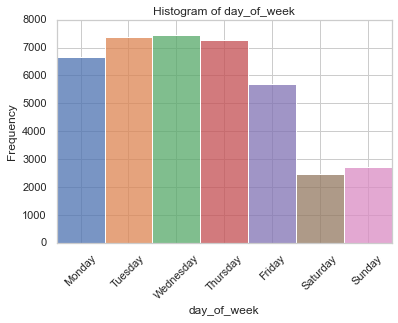

In [37]:
# Frequency count of our categorical response variables day_of_week

print(df['day_of_week'].value_counts())
# df['day_of_week'].value_counts().plot(kind='bar')
categorical_variables = ['day_of_week']
# Group the DataFrame by the categorical variables

sns.set(style="whitegrid")

# Create a single figure for all subplots
plt.figure()

# Loop through categorical variables
for column in categorical_variables:
    grouped_df_days = df.groupby(column)
    
    # Create a histogram for each group using Seaborn without KDE
    ax = sns.histplot(data=df, x=column, hue=column, multiple="stack", bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    labels = df[column].unique()

    legend = ax.legend(labels=labels, title=column, loc='lower left')
    legend.set_visible(False)  # Hide the legend

    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the single figure with all subplots
plt.show()

A dropoff in the amount of news articles being posted has visual evidence of beginning on Friday and continuing to Saturday and Sunday which half less than half the amount of articles that the other days have.

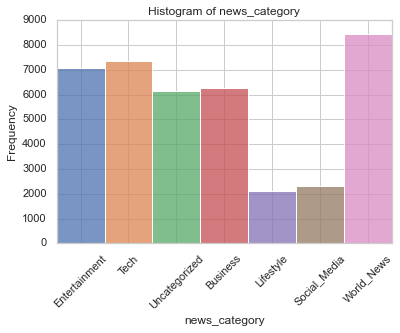

In [38]:
# Frequency count by news_category 

categorical_variables = ['news_category']
# Group the DataFrame by the categorical variables
for column in categorical_variables:
  grouped_df = df.groupby(column)


sns.set(style="whitegrid")

# Create a single figure for all subplots
plt.figure()

# Loop through categorical variables
for column in categorical_variables:
    grouped_df = df.groupby(column)
    labels = df[column].unique()

    # Create a histogram for each group using Seaborn without KDE
    ax = sns.histplot(data=df, x=column, hue=column, multiple="stack", bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    legend = ax.legend(labels=labels, title=column, loc='lower left')
    legend.set_visible(False)  # Hide the legend
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the single figure with all subplots
plt.show()

World_News is the most frequent category of news published while Lifestyle is the least frequent with Social_Media being slighlty more frequent.
Entertainment, Tech, and Business were much more frequent than Lifestyle and Social_Media but less frequent than World_News.

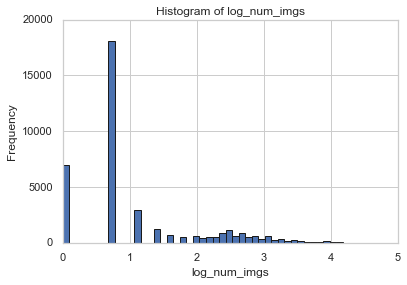

In [39]:
plt.hist(df['log_num_imgs'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_imgs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_imgs')
plt.grid(True)
plt.show()

We see a higher frequency of lower values when looking at the log of the number of images. This shows us that lower amounts of images were more often used.

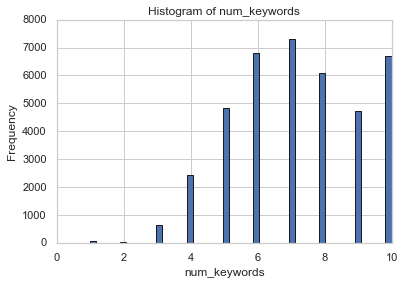

In [40]:
plt.hist(df['num_keywords'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_keywords')
plt.ylabel('Frequency')
plt.title('Histogram of num_keywords')
plt.grid(True)
plt.show()

We see a higher frequency of higher values when looking at the number of keywords in the article. It is more common to use about 7 key words. More articles use more keywords than those that use less.

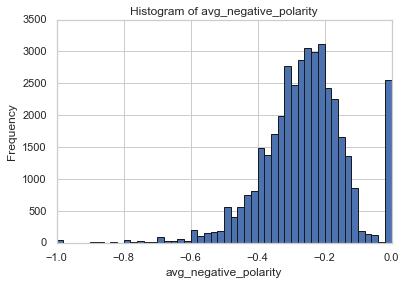

In [41]:
plt.hist(df['avg_negative_polarity'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('avg_negative_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of avg_negative_polarity')
plt.grid(True)
plt.show()

We see a higher frequency among the higher values when looking at average negative polarity. There is visual evidence that more articles have a higher average negative polarity than those that have a lower average negative polarity.

## Explore Joint Attributes

### Scatter Plots

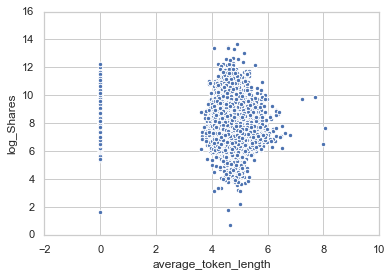

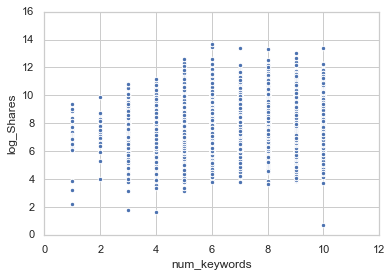

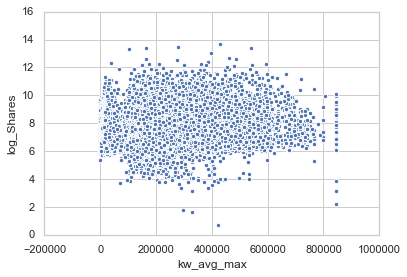

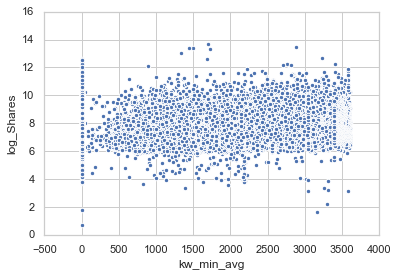

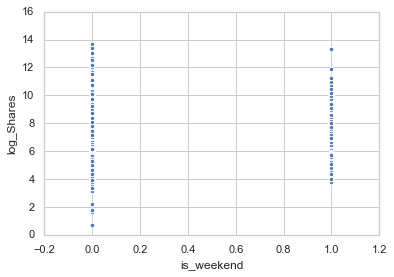

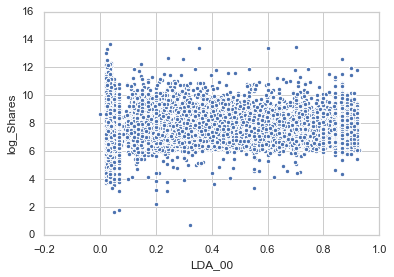

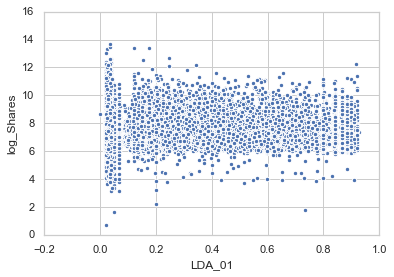

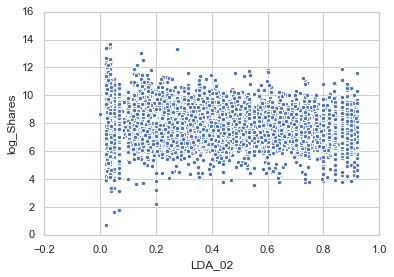

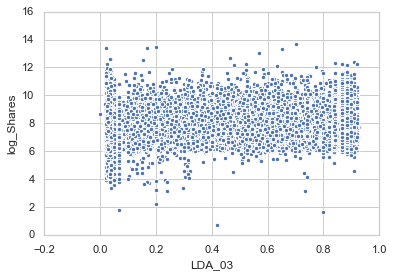

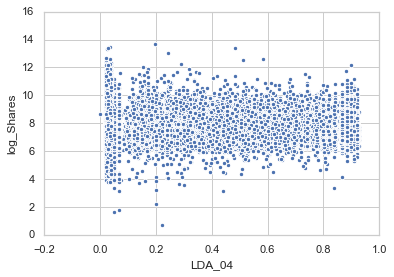

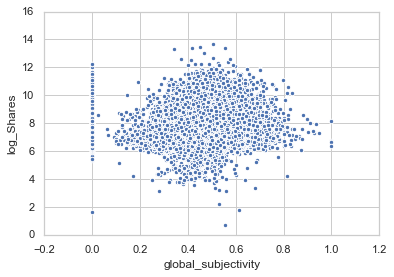

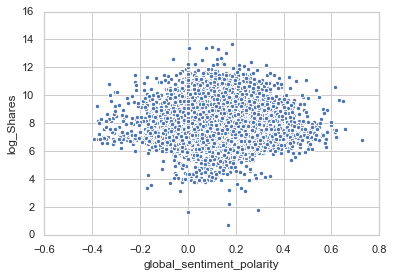

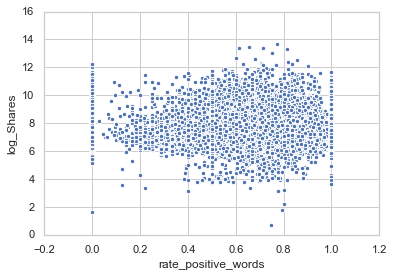

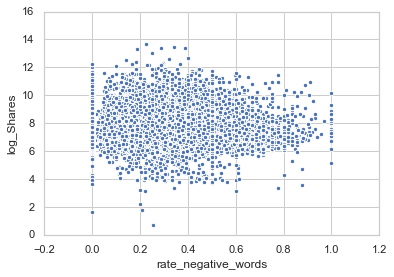

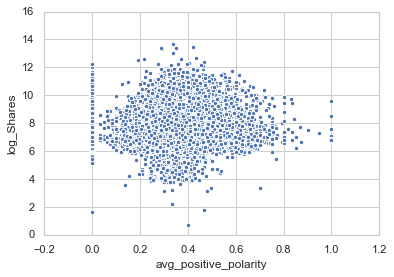

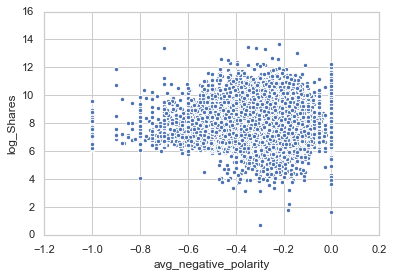

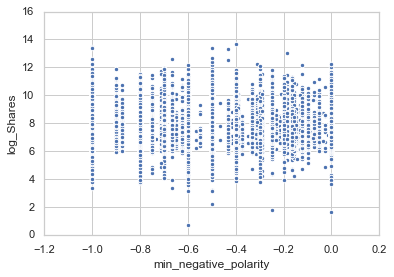

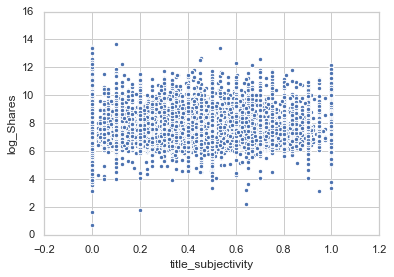

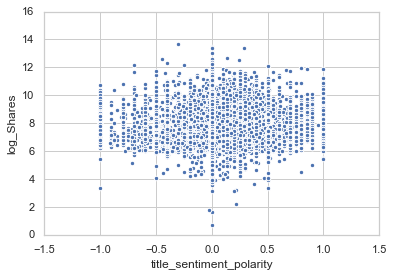

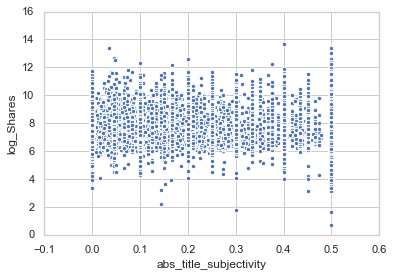

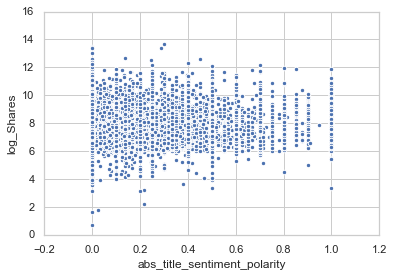

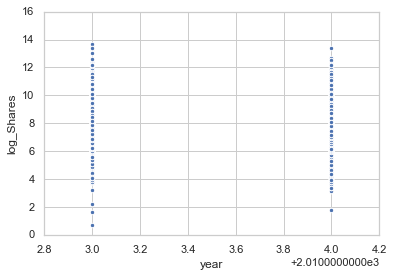

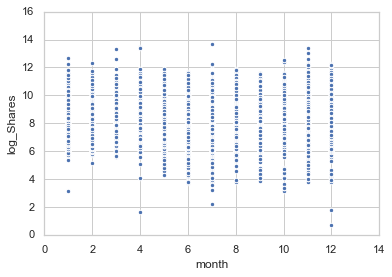

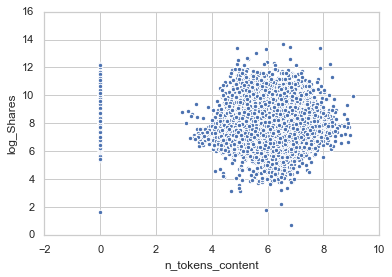

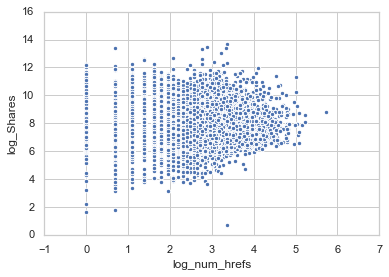

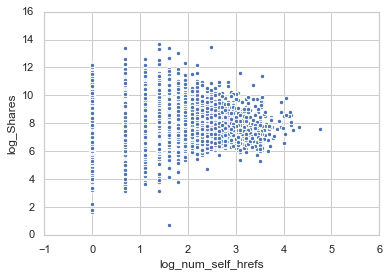

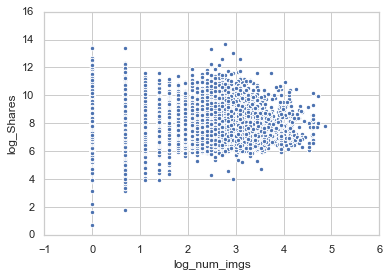

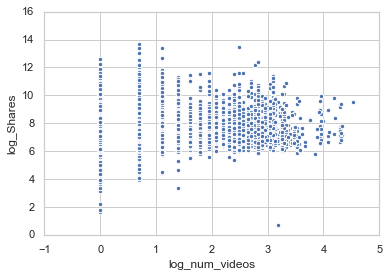

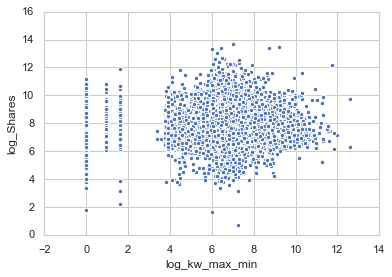

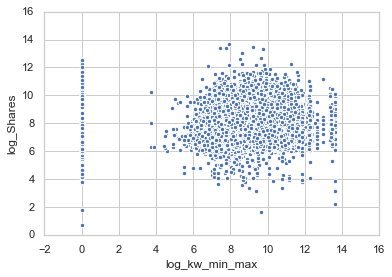

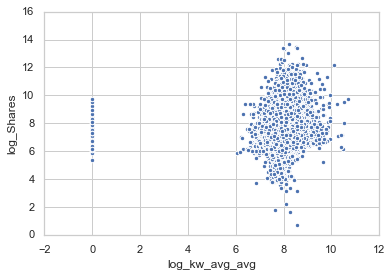

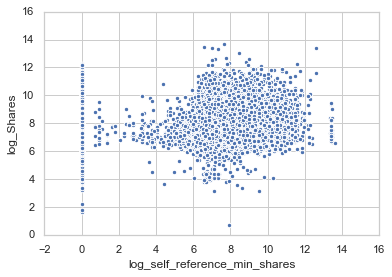

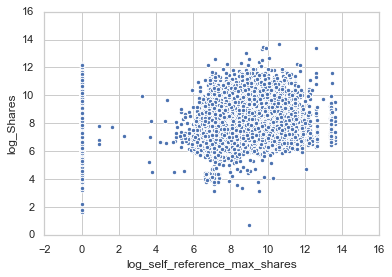

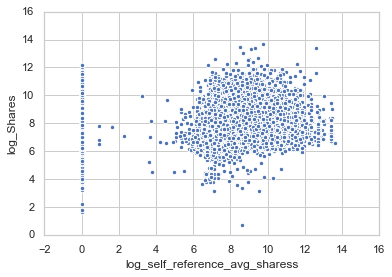

In [42]:

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['average_token_length'], df['log_shares'])

# Add labels and title
plt.xlabel('average_token_length')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['num_keywords'], df['log_shares'])

# Add labels and title
plt.xlabel('num_keywords')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['kw_avg_max'], df['log_shares'])

# Add labels and title
plt.xlabel('kw_avg_max')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['kw_min_avg'], df['log_shares'])

# Add labels and title
plt.xlabel('kw_min_avg')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['is_weekend'], df['log_shares'])

# Add labels and title
plt.xlabel('is_weekend')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['LDA_00'], df['log_shares'])

# Add labels and title
plt.xlabel('LDA_00')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['LDA_01'], df['log_shares'])

# Add labels and title
plt.xlabel('LDA_01')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['LDA_02'], df['log_shares'])

# Add labels and title
plt.xlabel('LDA_02')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['LDA_03'], df['log_shares'])

# Add labels and title
plt.xlabel('LDA_03')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['LDA_04'], df['log_shares'])

# Add labels and title
plt.xlabel('LDA_04')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['global_subjectivity'], df['log_shares'])

# Add labels and title
plt.xlabel('global_subjectivity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['global_sentiment_polarity'], df['log_shares'])

# Add labels and title
plt.xlabel('global_sentiment_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['rate_positive_words'], df['log_shares'])

# Add labels and title
plt.xlabel('rate_positive_words')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['rate_negative_words'], df['log_shares'])

# Add labels and title
plt.xlabel('rate_negative_words')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['avg_positive_polarity'], df['log_shares'])

# Add labels and title
plt.xlabel('avg_positive_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['avg_negative_polarity'], df['log_shares'])

# Add labels and title
plt.xlabel('avg_negative_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['min_negative_polarity'], df['log_shares'])

# Add labels and title
plt.xlabel('min_negative_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['title_subjectivity'], df['log_shares'])

# Add labels and title
plt.xlabel('title_subjectivity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['title_sentiment_polarity'], df['log_shares'])

# Add labels and title
plt.xlabel('title_sentiment_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['abs_title_subjectivity'], df['log_shares'])

# Add labels and title
plt.xlabel('abs_title_subjectivity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['abs_title_sentiment_polarity'], df['log_shares'])

# Add labels and title
plt.xlabel('abs_title_sentiment_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['year'], df['log_shares'])

# Add labels and title
plt.xlabel('year')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['month'], df['log_shares'])

# Add labels and title
plt.xlabel('month')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_n_tokens_content'], df['log_shares'])

# Add labels and title
plt.xlabel('n_tokens_content')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_num_hrefs'], df['log_shares'])

# Add labels and title
plt.xlabel('log_num_hrefs')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_num_self_hrefs'], df['log_shares'])

# Add labels and title
plt.xlabel('log_num_self_hrefs')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_num_imgs'], df['log_shares'])

# Add labels and title
plt.xlabel('log_num_imgs')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_num_videos'], df['log_shares'])

# Add labels and title
plt.xlabel('log_num_videos')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_kw_max_min'], df['log_shares'])

# Add labels and title
plt.xlabel('log_kw_max_min')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_kw_min_max'], df['log_shares'])

# Add labels and title
plt.xlabel('log_kw_min_max')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_kw_avg_avg'], df['log_shares'])

# Add labels and title
plt.xlabel('log_kw_avg_avg')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_self_reference_min_shares'], df['log_shares'])

# Add labels and title
plt.xlabel('log_self_reference_min_shares')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_self_reference_max_shares'], df['log_shares'])

# Add labels and title
plt.xlabel('log_self_reference_max_shares')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df['log_self_reference_avg_sharess'], df['log_shares'])

# Add labels and title
plt.xlabel('log_self_reference_avg_sharess')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

None of the scatterplots revealed a linear relationship with log_shares even after transforming many of the variables.

### Correlation

In [43]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                                timedelta  average_token_length  num_keywords  \
timedelta                        1.000000              0.130465      0.046884   
average_token_length             0.130465              1.000000     -0.016814   
num_keywords                     0.046884             -0.016814      1.000000   
kw_avg_max                      -0.493093             -0.157419     -0.332221   
kw_min_avg                      -0.157204             -0.076706     -0.272042   
is_weekend                       0.000272              0.003390      0.074647   
LDA_00                           0.080894              0.078901     -0.154895   
LDA_01                           0.004423             -0.022011     -0.062415   
LDA_02                          -0.141713              0.099121     -0.019643   
LDA_03                          -0.030838             -0.181714      0.022726   
LDA_04                           0.092906              0.033738      0.184254   
global_subjectivity         

In [44]:
# Initialize empty DataFrames to store the positive and negative correlations
positive_correlations = pd.DataFrame()
negative_correlations = pd.DataFrame()

# Loop through the correlation matrix and filter the values
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2:  # Avoid comparing the same columns
            correlation = correlation_matrix.loc[column1, column2]

            if 0.7 <= correlation <= 1:
                positive_correlations.loc[column1, column2] = correlation

            if -1 <= correlation <= -0.7:
                negative_correlations.loc[column1, column2] = correlation

# Display the DataFrames containing the desired correlations
print("Positive Correlations:")
print(positive_correlations)

print("\nNegative Correlations:")
print(negative_correlations)

Positive Correlations:
                                log_n_tokens_content  log_n_non_stop_words  \
average_token_length                        0.768795              0.912005   
kw_min_avg                                       NaN                   NaN   
global_sentiment_polarity                        NaN                   NaN   
rate_positive_words                              NaN                   NaN   
rate_negative_words                              NaN                   NaN   
avg_positive_polarity                            NaN                   NaN   
avg_negative_polarity                            NaN                   NaN   
min_negative_polarity                            NaN                   NaN   
title_subjectivity                               NaN                   NaN   
abs_title_sentiment_polarity                     NaN                   NaN   
log_n_tokens_content                             NaN              0.795685   
log_n_unique_tokens                      

In [45]:
#Extract pairs and correlation coefficients from positive_correlations
positive_pairs = [(column1, column2, correlation)
                  for column1, column2, correlation in positive_correlations.stack().reset_index().values]

#Extract pairs and correlation coefficients from negative_correlations
negative_pairs = [(column1, column2, correlation)
                  for column1, column2, correlation in negative_correlations.stack().reset_index().values]

#Display the positive correlation pairs and coefficients
print("Positive Correlations:")
for pair in positive_pairs:
    column1, column2, correlation = pair
    print(f"{column1} - {column2}: {correlation}")

#Display the negative correlation pairs and coefficients
print("\nNegative Correlations:")
for pair in negative_pairs:
    column1, column2, correlation = pair
    print(f"{column1} - {column2}: {correlation}")

Positive Correlations:
average_token_length - log_n_tokens_content: 0.7687954349526525
average_token_length - log_n_non_stop_words: 0.9120053615947799
average_token_length - log_n_non_stop_unique_tokens: 0.7428240837766351
kw_min_avg - log_kw_min_max: 0.9267844586036433
global_sentiment_polarity - rate_positive_words: 0.727827389660965
rate_positive_words - global_sentiment_polarity: 0.727827389660965
rate_negative_words - log_global_rate_negative_words: 0.782517218396876
avg_positive_polarity - log_max_positive_polarity: 0.731000453695277
avg_negative_polarity - min_negative_polarity: 0.748896177849891
min_negative_polarity - avg_negative_polarity: 0.748896177849891
title_subjectivity - abs_title_sentiment_polarity: 0.7145275893497902
abs_title_sentiment_polarity - title_subjectivity: 0.7145275893497902
log_n_tokens_content - log_n_non_stop_words: 0.7956850361954444
log_n_tokens_content - average_token_length: 0.7687954349526525
log_n_unique_tokens - log_n_non_stop_words: 0.7682144252

<AxesSubplot:>

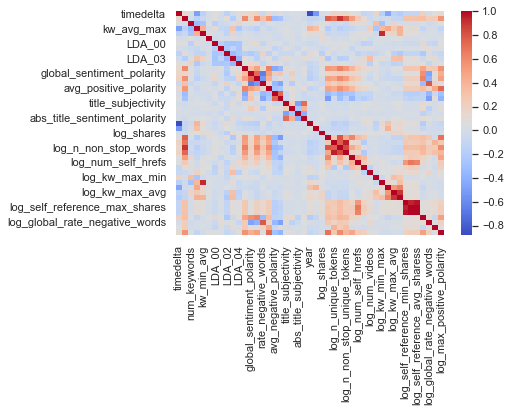

In [46]:
# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, cmap = 'coolwarm')

### Cross-Tabulation 

In [47]:
df.dtypes

url_name                                  object
date                              datetime64[ns]
timedelta                                float64
average_token_length                     float64
num_keywords                             float64
kw_avg_max                               float64
kw_min_avg                               float64
is_weekend                               float64
LDA_00                                   float64
LDA_01                                   float64
LDA_02                                   float64
LDA_03                                   float64
LDA_04                                   float64
global_subjectivity                      float64
global_sentiment_polarity                float64
rate_positive_words                      float64
rate_negative_words                      float64
avg_positive_polarity                    float64
avg_negative_polarity                    float64
min_negative_polarity                    float64
title_subjectivity  

In [48]:
# Perform a cross tabulation
ct = pd.crosstab(df['day_of_week'], df['news_category'])

# Print the cross tabulation table
print(ct)

news_category  Business  Entertainment  Lifestyle  Social_Media  Tech  \
day_of_week                                                             
Friday              832            972        305           332   989   
Monday             1153           1358        322           337  1235   
Saturday            243            380        182           180   525   
Sunday              343            536        210           137   396   
Thursday           1234           1231        358           463  1310   
Tuesday            1182           1285        334           458  1474   
Wednesday          1271           1295        388           416  1417   

news_category  Uncategorized  World_News  
day_of_week                               
Friday                   966        1305  
Monday                   900        1356  
Saturday                 424         519  
Sunday                   548         567  
Thursday                1102        1569  
Tuesday                 1111        1546 

Saturday and Sunday have evidence of being slow-news days relative to the rest of the week in each category.

World news has the most instances with Lifestyle having the least.

### Group-Wise Averages

#### day_of_week

In [49]:
df.groupby('day_of_week')['log_shares'].mean()

day_of_week
Friday       7.487290
Monday       7.458650
Saturday     7.762236
Sunday       7.738450
Thursday     7.420415
Tuesday      7.415298
Wednesday    7.404855
Name: log_shares, dtype: float64

The weekend (Fri-Sun) seems to be the time when the most shares happen 

In [50]:
df.groupby('day_of_week')['title_sentiment_polarity'].mean()

day_of_week
Friday       0.067357
Monday       0.065491
Saturday     0.097434
Sunday       0.090061
Thursday     0.070237
Tuesday      0.073242
Wednesday    0.063776
Name: title_sentiment_polarity, dtype: float64

The polarity of the title appears to be higher on the weekends (Fri-Sun)

In [51]:
df.groupby('day_of_week')['rate_negative_words'].mean()

day_of_week
Friday       0.295742
Monday       0.290736
Saturday     0.284468
Sunday       0.289825
Thursday     0.287761
Tuesday      0.283576
Wednesday    0.284382
Name: rate_negative_words, dtype: float64

Rate of negative words stats steady throughout the week.

#### news_category

In [52]:
df.groupby('news_category')['log_shares'].mean()

news_category
Business         7.410012
Entertainment    7.310817
Lifestyle        7.606337
Social_Media     7.778057
Tech             7.582007
Uncategorized    7.818715
World_News       7.204281
Name: log_shares, dtype: float64

World news has the most shares with Lifestyle and Socmed close behind.

Entertainment jas the least amount of shares but not by a much larger margin then Bus or Tech.

In [53]:
df.groupby('news_category')['title_sentiment_polarity'].mean()

news_category
Business         0.080190
Entertainment    0.064617
Lifestyle        0.109075
Social_Media     0.097425
Tech             0.086359
Uncategorized    0.086529
World_News       0.030061
Name: title_sentiment_polarity, dtype: float64

The polarity of the title is higher on Lifestyle and SocMed articles.

World and Entertainment have the lowest average polarity score for their titles.

In [54]:
df.groupby('news_category')['rate_negative_words'].mean()

news_category
Business         0.258300
Entertainment    0.305044
Lifestyle        0.266885
Social_Media     0.250294
Tech             0.250580
Uncategorized    0.285046
World_News       0.345893
Name: rate_negative_words, dtype: float64

Rate of negative words stats steady throug the categories other than World and Entertainment which are higher.

## Explore Attributes and Class

In [55]:
df.columns

Index(['url_name', 'date', 'timedelta', 'average_token_length', 'num_keywords',
       'kw_avg_max', 'kw_min_avg', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'day_of_week', 'news_category', 'year',
       'month', 'log_shares', 'log_n_tokens_content', 'log_n_unique_tokens',
       'log_n_non_stop_words', 'log_n_non_stop_unique_tokens', 'log_num_hrefs',
       'log_num_self_hrefs', 'log_num_imgs', 'log_num_videos',
       'log_kw_max_min', 'log_kw_min_max', 'log_kw_max_max', 'log_kw_max_avg',
       'log_kw_avg_avg', 'log_self_reference_min_shares',
       'log_self_reference_max_shares', 'log_self_reference_avg_sharess',
       'log_global_rate_positive_w

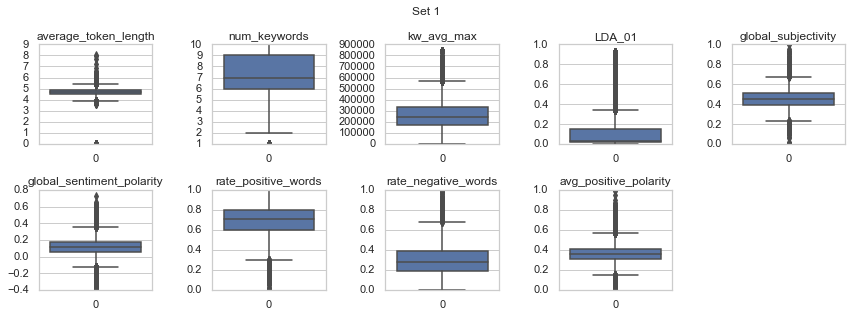

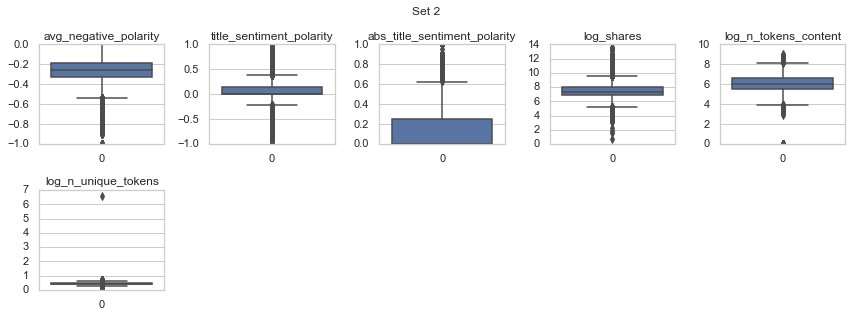

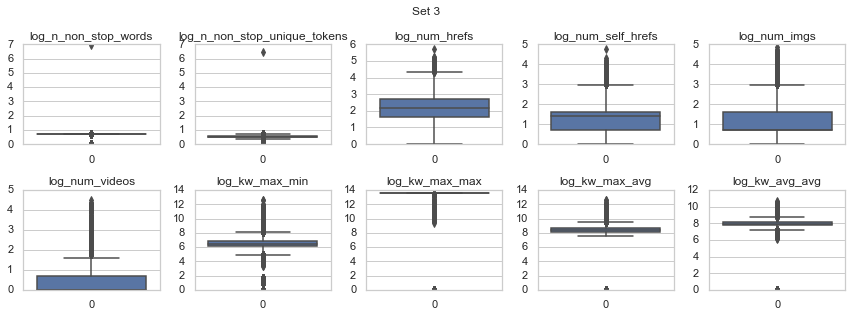

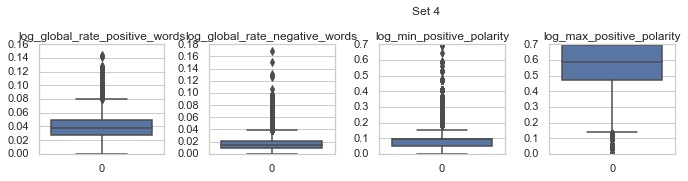

In [56]:
# Outliers

# Create a list of the variable names to identify outliers
selected_variables1 = ['timedelta', 'average_token_length', 'num_keywords',
       'kw_avg_max', 'kw_min_avg', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity']
selected_variables2 = ['avg_negative_polarity', 'min_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'year',
       'month', 'log_shares', 'log_n_tokens_content', 'log_n_unique_tokens']
selected_variables3 = ['log_n_non_stop_words', 'log_n_non_stop_unique_tokens', 'log_num_hrefs',
       'log_num_self_hrefs', 'log_num_imgs', 'log_num_videos',
       'log_kw_max_min', 'log_kw_min_max', 'log_kw_max_max', 'log_kw_max_avg',
       'log_kw_avg_avg', 'log_self_reference_min_shares']
selected_variables4 = ['log_self_reference_max_shares', 'log_self_reference_avg_sharess',
       'log_global_rate_positive_words', 'log_global_rate_negative_words',
       'log_min_positive_polarity', 'log_max_positive_polarity']

# Create a list of selected variable lists
selected_variables_list = [selected_variables1, selected_variables2, selected_variables3, selected_variables4]

# Loop through the selected variable lists
for idx, selected_variables in enumerate(selected_variables_list):
    # Select the variables from the DataFrame
    dfO = df[selected_variables]

    # Calculate the Z-scores for each variable
    z_scores = np.abs((dfO - dfO.mean()) / dfO.std())

    # Define a threshold for considering values as outliers (e.g., Z-score > 3)
    threshold = 3

    # Create a boolean DataFrame where True represents outliers
    outliers = z_scores > threshold

    # Identify variables with outliers
    variables_with_outliers = dfO.columns[outliers.any()]

    # Create boxplots for variables with outliers
    plt.figure(figsize=(12, 8))
    for variable in variables_with_outliers:
        plt.subplot(4, 5, list(variables_with_outliers).index(variable) + 1)  # Create a subplot for each variable
        sns.boxplot(data=df[variable], orient='v', whis=1.5, fliersize=5)
        plt.title(variable)
        plt.xticks(rotation=0)

    plt.tight_layout()
    plt.suptitle(f'Set {idx + 1}', y=1.02)  # Add a title for the set of variables
    plt.show()

Among many of the different features present in the dataset, we came across quite a few outliers present. Some outliers were obviously present on non-skewed data as well. However, after transformation, these outliers were able to stand out more obvious.
These outliers may prove to be larger issues further down the line. We will now more as we work with and make models with the data.

### Violin Plots

#### news_category vs. ...

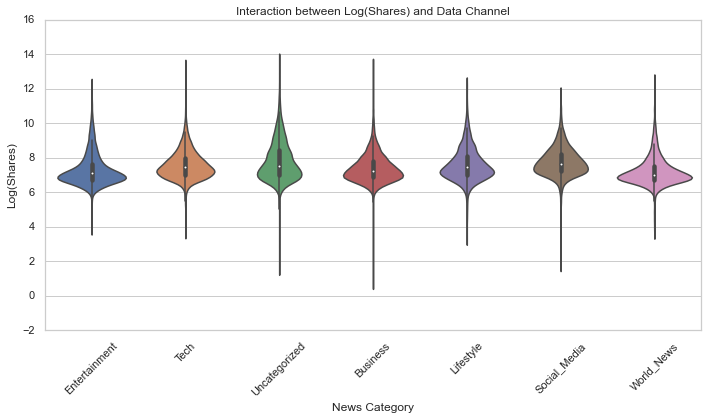

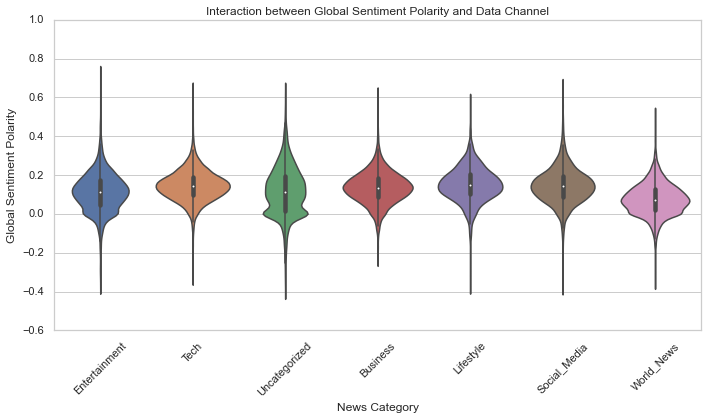

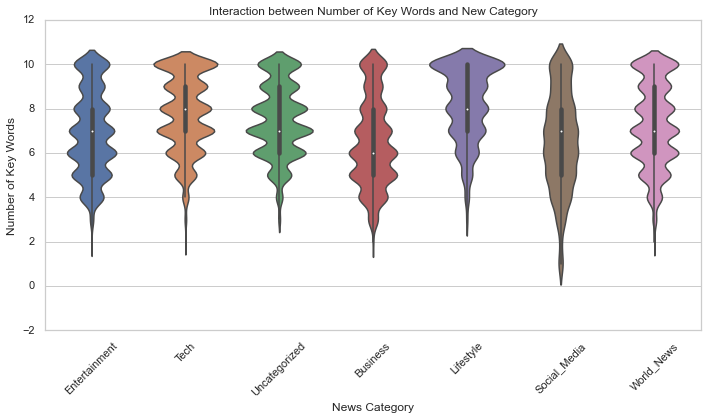

In [57]:
# log_shares
plt.figure(figsize=(10, 6))
sns.violinplot(x='news_category', y='log_shares', data=df)
plt.title('Interaction between Log(Shares) and Data Channel')
plt.xlabel('News Category')
plt.ylabel('Log(Shares)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# global_sentiment_polarity
plt.figure(figsize=(10, 6))
sns.violinplot(x='news_category', y='global_sentiment_polarity', data=df)
plt.title('Interaction between Global Sentiment Polarity and Data Channel')
plt.xlabel('News Category')
plt.ylabel('Global Sentiment Polarity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# global_sentiment_polarity
plt.figure(figsize=(10, 6))
sns.violinplot(x='news_category', y='num_keywords', data=df)
plt.title('Interaction between Number of Key Words and New Category')
plt.xlabel('News Category')
plt.ylabel('Number of Key Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

The last of these violin plots is of particular interest to us. The multinodal nature of the visualization give visual evidence that there are sub-populations present in the number of key words variable. These plots are able to give quite a bit of information concerning the variables that may be found in other visualizations. 
From viewing the distribution of the data we are able to see that within each news category there are sub-populations that likley have something interesting going on within them.

#### day_of_week vs. ...

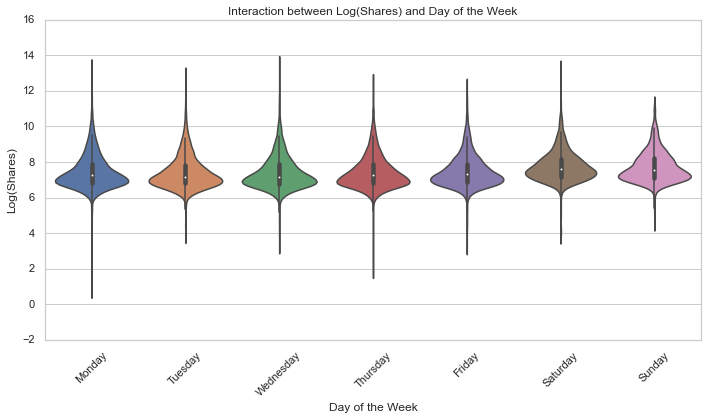

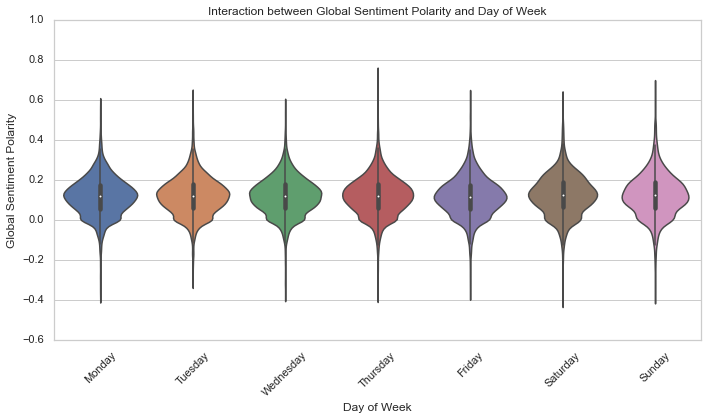

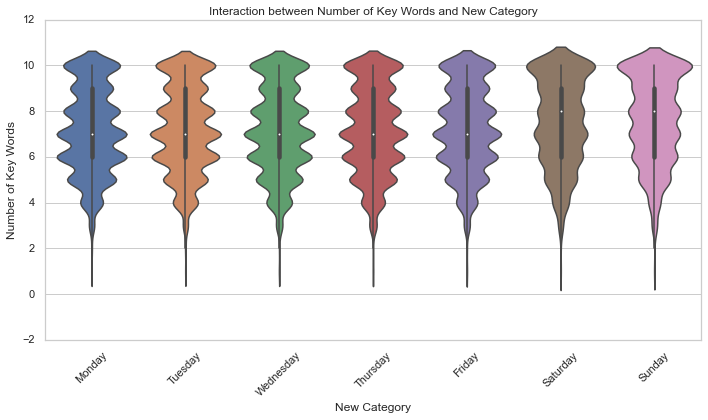

In [58]:
#log_shares
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='log_shares', data=df)
plt.title('Interaction between Log(Shares) and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Log(Shares)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# log_global_sentiment_polarity
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='global_sentiment_polarity', data=df)
plt.title('Interaction between Global Sentiment Polarity and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Global Sentiment Polarity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Violin Plot log_num_keywords
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='num_keywords', data=df)
plt.title('Interaction between Number of Key Words and New Category')
plt.xlabel('New Category')
plt.ylabel('Number of Key Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

The last of these violin plots is of particular interest to us. The multinodal nature of the visualization give visual evidence that there are sub-populations present in the number of key words variable. These plots are able to give quite a bit of information concerning the variables that may be found in other visualizations. 
From viewing the distribution of the data we are able to see throughout the week there are sub-populations that likley have something interesting going on within them.

Violin plots were generated to show the distribution of select variables categorized by either the day_of_week or news_category.  These plots provided a way of visualizing not only content observed in a boxplot, they also provided visualization on the density of the data distribution.  Another feature of the violin plots it the ability to visualize possible multimodal data, which may be an indication of subpopulations that may to be further analyzed.

## New Features

The url column was broken down to by date and url name. 
Date was then broken down by month and year. 
A number of one-hot encoded columns indicating day of the week the article was published were grouped into a single column and bucketed by day. 
The same process was repeated on the one-hot encoded data channels columns into a single column news_category.

# Exceptional Work

1: extra joint attribute plots

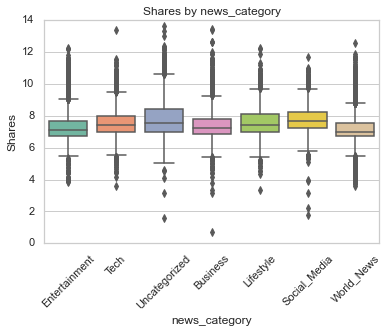

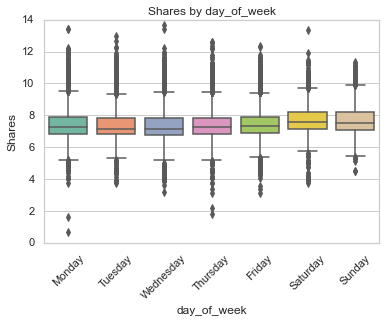

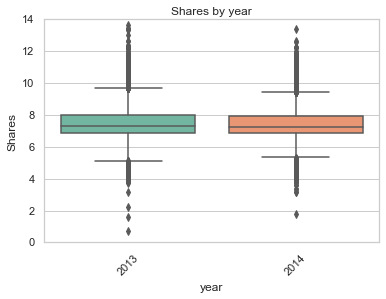

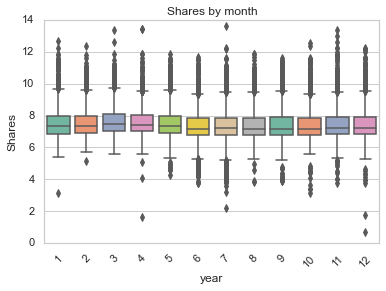

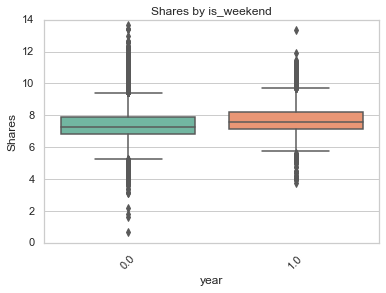

In [63]:
#Explore Joint Attributes shares versus ***
#shares versus news_category

#Create a bar plot with Seaborn
# df['log_shares'] = np.log1p(df['shares'])

#Create a bar plot with Seaborn
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['news_category'], y=df['log_shares'], palette="Set2")

plt.xlabel('news_category')
plt.ylabel('Shares')
plt.title('Shares by news_category')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#shares versus day_of_week 
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['day_of_week'], y=df['log_shares'], palette="Set2")
plt.xlabel('day_of_week')
plt.ylabel('Shares')
plt.title('Shares by day_of_week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# shares versus year
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['year'], y=df['log_shares'], palette="Set2")
plt.xlabel('year')
plt.ylabel('Shares')
plt.title('Shares by year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# shares versus month
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['month'], y=df['log_shares'], palette="Set2")
plt.xlabel('year')
plt.ylabel('Shares')
plt.title('Shares by month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# shares versus is_weekend
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['is_weekend'], y=df['log_shares'],palette="Set2")
plt.xlabel('year')
plt.ylabel('Shares')
plt.title('Shares by is_weekend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

2: Orginal data cleaning of past dataset. We swtiched datasets after working a few days on cleaning this one.
There was limited data and though we could've continued with it as the professor had stated, it was the time to choose whether or not to switch datasets.

In [66]:
# Include
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as skl
import scipy as sc

# Read in the data
df = pd.read_csv('../Data/waterPollution.csv')
df.head()

# Look at the variables
print(df.info())
df.describe()

# Just testing out no impact on clean data
# Frequencies in Actual Order
#dfc1 = df['phenomenonTimeReferenceYear'].value_counts().sort_index()
#print(dfc1)

# This block does not impact the cleaned dataset
# Determine missing Countries
grdbyNC = df.groupby(['observedPropertyDeterminandCode','Country'], dropna=False)

# Calculate frequency and percentage for each group
grdbyNC = grdbyNC.size().reset_index(name='Frequency')

print(grdbyNC)

# Export the DataFrame to a CSV file
#grdbyNC.to_csv('grdbyNC.csv', index=False)


# Remove all records where Country is missing as multiple varibles per records are missing also
dfClean = df.dropna(subset=['Country'])

# Drop rows where multiple columns are null 
# There are three records, after country is deleted, that have most values null
dfClean = df.dropna(subset=['PopulationDensity', 'TerraMarineProtected_2016_2018', 
                            'TouristMean_1990_2020', 'netMigration_2011_2018', 'droughts_floods_temperature'], how='all')

# Export the DataFrame to a CSV file
#dfClean.to_csv('DropCountry.csv', index=False)

#This block is for determining the uniqueness of the records and identifying duplicates
# This block does not impact the cleaned dataset
# Group data by the five variables
grd_df1 = df.groupby(['Country', 'waterBodyIdentifier','observedPropertyDeterminandCode','phenomenonTimeReferenceYear','resultUom'], dropna=False)

# Calculate frequency for each group
rslt1 = grd_df1.size().reset_index(name='Frequency')

# Sort the result by 'Frequency' in descending order and filter where >1
rslt1 = rslt1.sort_values(by='Frequency', ascending=False)
rslt1 = rslt1[rslt1['Frequency'] > 1]
print(rslt1)

# Export the DataFrame to a CSV file
#rslt1.to_csv('lab1_freq_rslt1.csv', index=False)

# Remove duplicate records per the groupby
# Group the filtered DataFrame by 'Country', 'waterBodyIdentifier', 'observedPropertyDeterminandCode', 'phenomenonTimeReferenceYear', 'resultUom'
GrDfClean = dfClean.groupby(['Country', 'waterBodyIdentifier', 'observedPropertyDeterminandCode', 'phenomenonTimeReferenceYear', 'resultUom'])

# Calculate the average of 'resultMeanValue' for each group
averages = GrDfClean['resultMeanValue'].mean().reset_index()

# Merge the calculated averages back into the original DataFrame 'df'
ReducedDF = dfClean.merge(averages, on=['Country', 'waterBodyIdentifier', 'observedPropertyDeterminandCode', 'phenomenonTimeReferenceYear', 'resultUom'], how='left')

# Rename the calculated average of resultMeanValue
if 'resultMeanValue_y' in ReducedDF.columns:
    ReducedDF.rename(columns={'resultMeanValue_y': 'AVGresultMeanValue'}, inplace=True)

# Remove duplicate records based on the specified columns, including 'AVGresultMeanValue'
dfClean = ReducedDF.drop_duplicates(subset=['Country', 'waterBodyIdentifier', 'observedPropertyDeterminandCode', 'phenomenonTimeReferenceYear', 'resultUom', 'AVGresultMeanValue'])

# Reset the index of the DataFrame after removing duplicates
dfClean.reset_index(drop=True, inplace=True)

print(dfClean)

# Export the DataFrame to a CSV file
dfClean.to_csv("../Data/CleanDF.csv")



# Look at the cleaned data
print(dfClean.info())
dfClean.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      20000 non-null  object 
 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   19427 non-null  object 
 1   observedPropertyDeterminandCode              19427 non-null  object 
 2   procedureAnalysedFraction                    19427 non-null  object 
 3   procedureAnalysedMedia                       19427 non-null  object 
 4   resultUom                                    19427 non-null  object 
 5   phenomenonTimeReferenceYear                  19427 non-null  int64  
 6   parameterSamplingPeriod                      19427 non-null  object 
 7   resultMeanValue_x                            19427 non-null  float64
 8   waterBodyIdentifier                          19427 non-null  object 
 9   Country                                      19427 non-null  object 
 10

phenomenonTimeReferenceYear  resultMeanValue_x  PopulationDensity  \
count                 19427.000000       19427.000000       19427.000000   
mean                   2008.984712          34.438765         150.899813   
std                       1.902932         176.052614          76.385636   
min                    1991.000000           0.000015          14.548292   
25%                    2008.000000           0.112859         122.299437   
50%                    2009.000000           1.994200         122.299437   
75%                    2009.000000          10.884425         205.418372   
max                    2017.000000       14108.000000         511.475928   

       TerraMarineProtected_2016_2018  TouristMean_1990_2020    VenueCount  \
count                    19427.000000           1.942700e+04  19427.000000   
mean                        26.220845           4.912229e+07      0.138570   
std                          6.799202           2.461262e+07      1.840983   
min                          3.875411           5.300380e+05      0.000000   
25%                         23.733280           2.586796e+07      0.000000   
50%                         30.831906           5.094169e+07      0.000000   
75%                         30.831906           7.117635e+07      0.000000   
max                         38.767234           7.117635e+07    100.000000   

       netMigration_2011_2018  droughts_floods_temperature  \
count            19427.000000                 19427.000000   
mean            116121.244183                     0.130505   
std             145485.174654                     0.261142   
min             -83749.750000                     0.000000   
25%              22854.875000                     0.005718   
50%              75808.375000                     0.005718   
75%              75808.375000                     0.032407   
max             582211.000000                     0.729194   

       literacyRate_2010_2018  combustibleRenewables_2009_2014           gdp  \
count            19427.000000                     19427.000000  1.942700e+04   
mean                14.858967                         4.609186  2.293793e+12   
std                 31.628265                         3.401473  9.258717e+11   
min                  0.000000                         1.064468  2.887150e+10   
25%                  0.000000                         3.754864  1.464509e+12   
50%                  0.000000                         4.457840  2.806036e+12   
75%                  0.000000                         4.457840  2.806036e+12   
max                 87.158924                        25.982190  3.781699e+12   

       composition_food_organic_waste_percent  composition_glass_percent  \
count                            19427.000000               19427.000000   
mean                                32.035828                   7.634771   
std                                 11.326351                   3.294284   
min                                 12.780000                   2.200000   
25%                                 29.000000                   5.440000   
50%                                 32.000000                  10.000000   
75%                                 32.000000                  10.000000   
max                                 62.300000                  21.400000   

       composition_metal_percent  composition_other_percent  \
count               19427.000000               19427.000000   
mean                    3.204014                  23.569207   
std                     1.138543                   6.535184   
min                     1.380000                   0.000000   
25%                     3.000000                  17.700000   
50%                     3.000000                  26.000000   
75%                     3.500000                  26.000000   
max                     9.200000                  44.050000   

       composition_paper_cardboard_percent  composition_plastic_percent  \
count      

3: individually made all the scatterplots

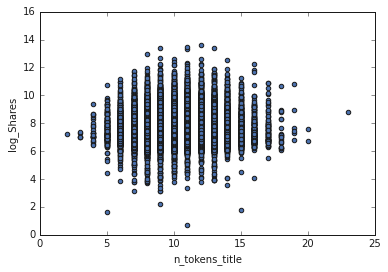

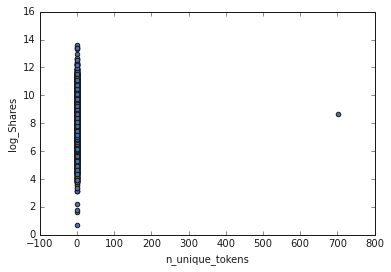

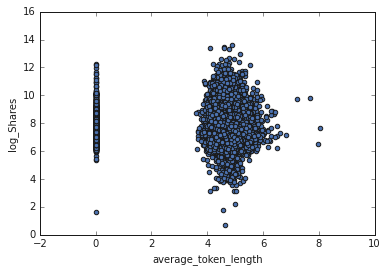

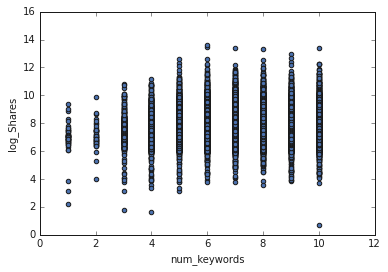

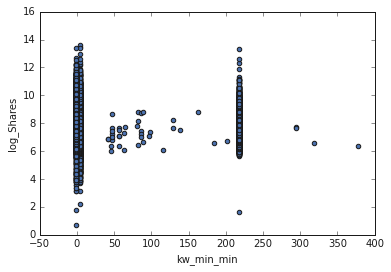

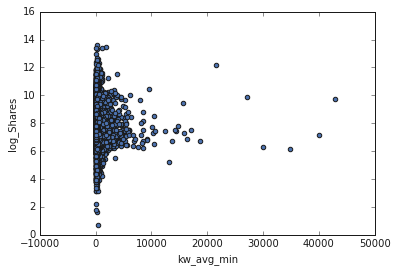

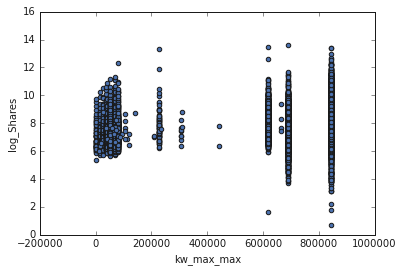

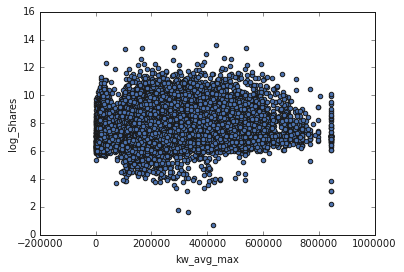

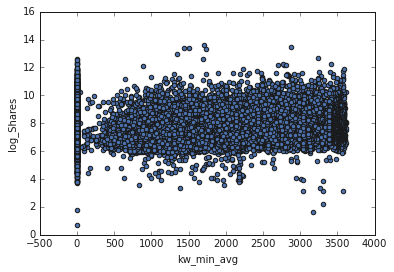

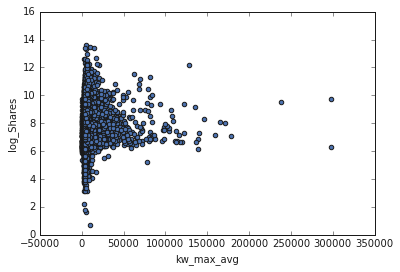

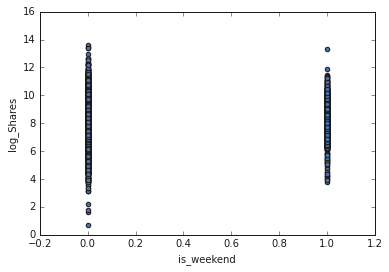

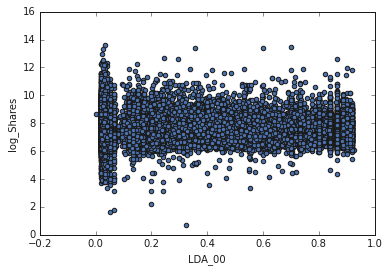

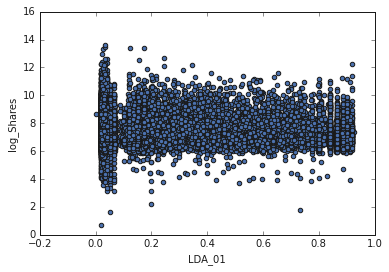

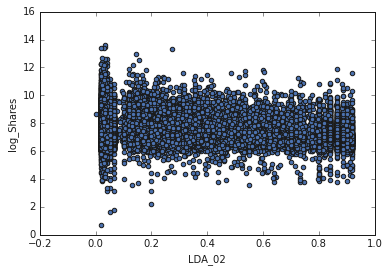

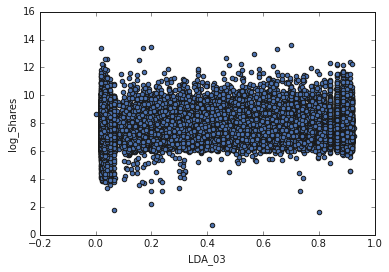

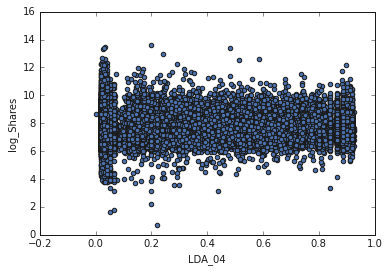

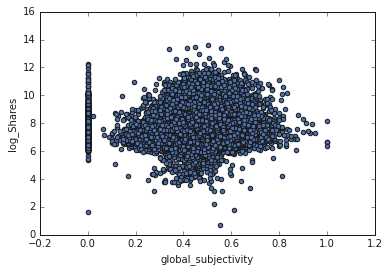

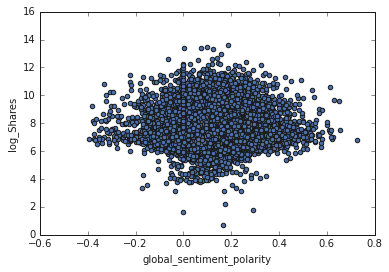

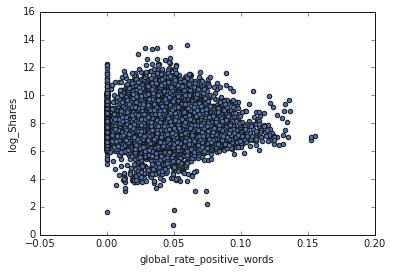

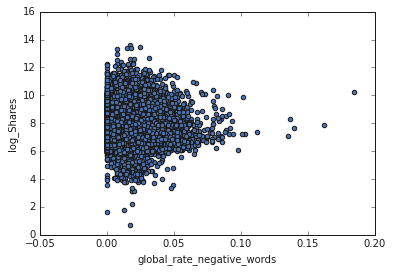

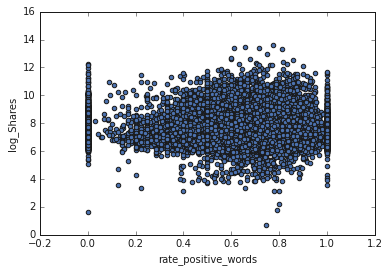

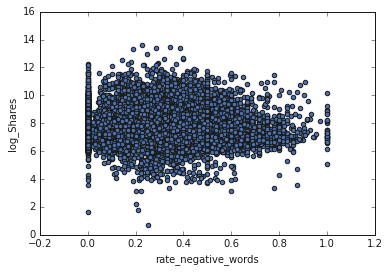

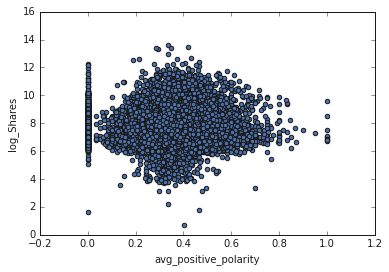

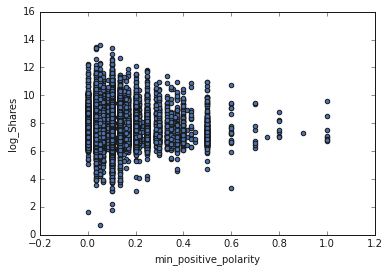

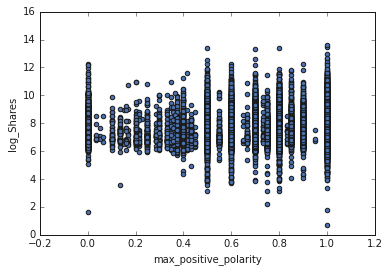

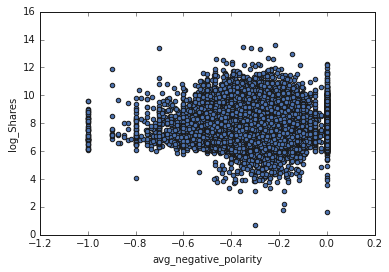

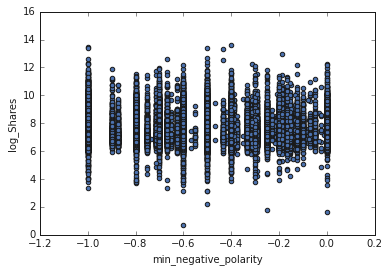

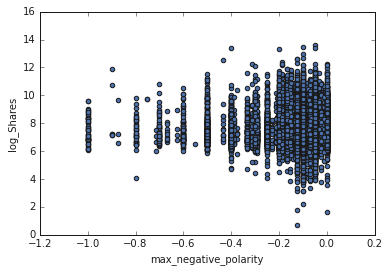

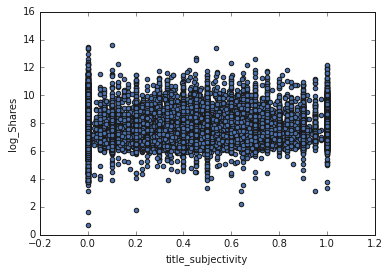

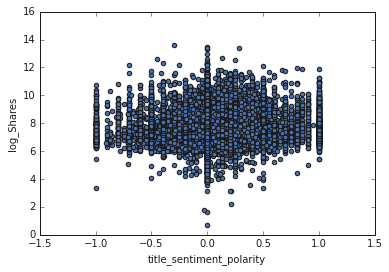

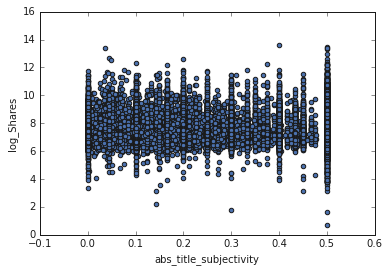

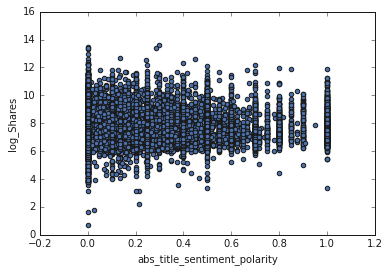

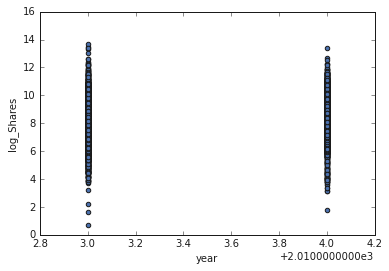

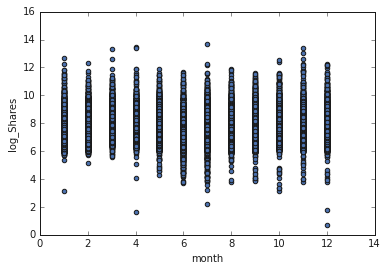

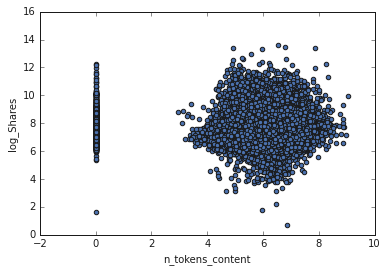

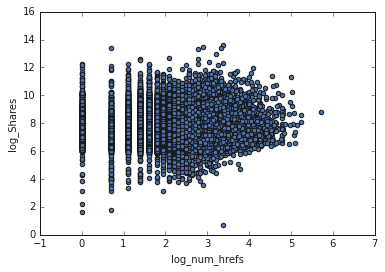

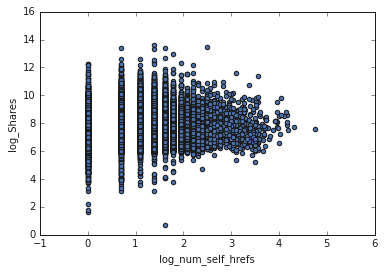

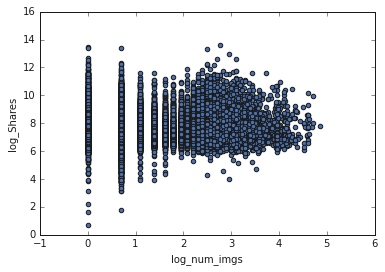

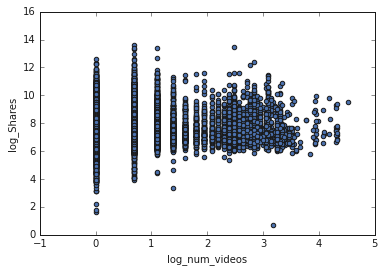

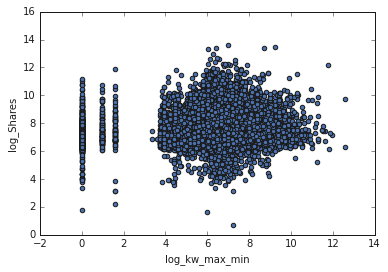

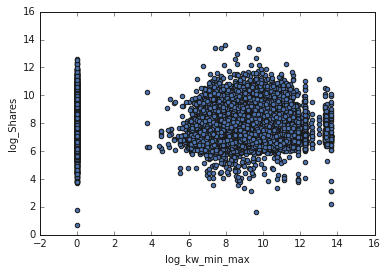

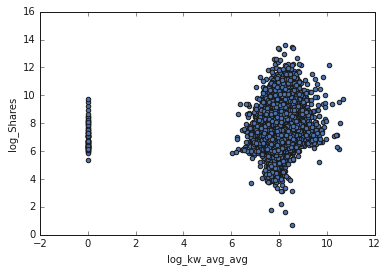

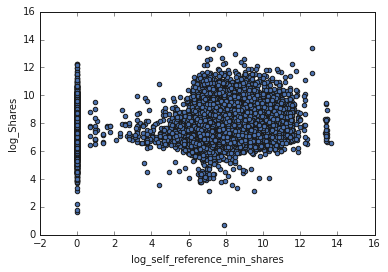

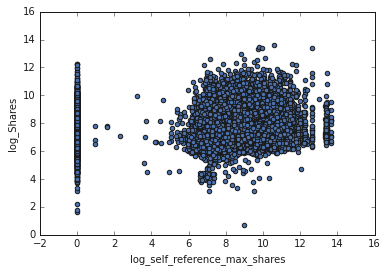

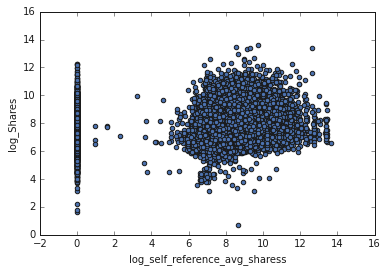

In [65]:
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['n_tokens_title'], df1['log_shares'])

# Add labels and title
plt.xlabel('n_tokens_title')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['n_unique_tokens'], df1['log_shares'])

# Add labels and title
plt.xlabel('n_unique_tokens')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['average_token_length'], df1['log_shares'])

# Add labels and title
plt.xlabel('average_token_length')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['num_keywords'], df1['log_shares'])

# Add labels and title
plt.xlabel('num_keywords')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['kw_min_min'], df1['log_shares'])

# Add labels and title
plt.xlabel('kw_min_min')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['kw_avg_min'], df1['log_shares'])

# Add labels and title
plt.xlabel('kw_avg_min')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['kw_max_max'], df1['log_shares'])

# Add labels and title
plt.xlabel('kw_max_max')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['kw_avg_max'], df1['log_shares'])

# Add labels and title
plt.xlabel('kw_avg_max')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['kw_min_avg'], df1['log_shares'])

# Add labels and title
plt.xlabel('kw_min_avg')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['kw_max_avg'], df1['log_shares'])

# Add labels and title
plt.xlabel('kw_max_avg')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['is_weekend'], df1['log_shares'])

# Add labels and title
plt.xlabel('is_weekend')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['LDA_00'], df1['log_shares'])

# Add labels and title
plt.xlabel('LDA_00')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['LDA_01'], df1['log_shares'])

# Add labels and title
plt.xlabel('LDA_01')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['LDA_02'], df1['log_shares'])

# Add labels and title
plt.xlabel('LDA_02')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['LDA_03'], df1['log_shares'])

# Add labels and title
plt.xlabel('LDA_03')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['LDA_04'], df1['log_shares'])

# Add labels and title
plt.xlabel('LDA_04')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['global_subjectivity'], df1['log_shares'])

# Add labels and title
plt.xlabel('global_subjectivity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['global_sentiment_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('global_sentiment_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['global_rate_positive_words'], df1['log_shares'])

# Add labels and title
plt.xlabel('global_rate_positive_words')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['global_rate_negative_words'], df1['log_shares'])

# Add labels and title
plt.xlabel('global_rate_negative_words')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['rate_positive_words'], df1['log_shares'])

# Add labels and title
plt.xlabel('rate_positive_words')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['rate_negative_words'], df1['log_shares'])

# Add labels and title
plt.xlabel('rate_negative_words')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['avg_positive_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('avg_positive_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['min_positive_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('min_positive_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['max_positive_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('max_positive_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['avg_negative_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('avg_negative_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['min_negative_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('min_negative_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['max_negative_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('max_negative_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['title_subjectivity'], df1['log_shares'])

# Add labels and title
plt.xlabel('title_subjectivity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['title_sentiment_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('title_sentiment_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['abs_title_subjectivity'], df1['log_shares'])

# Add labels and title
plt.xlabel('abs_title_subjectivity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['abs_title_sentiment_polarity'], df1['log_shares'])

# Add labels and title
plt.xlabel('abs_title_sentiment_polarity')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['year'], df1['log_shares'])

# Add labels and title
plt.xlabel('year')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['month'], df1['log_shares'])

# Add labels and title
plt.xlabel('month')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_n_tokens_content'], df1['log_shares'])

# Add labels and title
plt.xlabel('n_tokens_content')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_num_hrefs'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_num_hrefs')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_num_self_hrefs'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_num_self_hrefs')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_num_imgs'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_num_imgs')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_num_videos'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_num_videos')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_kw_max_min'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_kw_max_min')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_kw_min_max'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_kw_min_max')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_kw_avg_avg'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_kw_avg_avg')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_self_reference_min_shares'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_self_reference_min_shares')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_self_reference_max_shares'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_self_reference_max_shares')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

##########
# Create a scatter plot with x being 'shares' and y being 'price'
plt.scatter(df1['log_self_reference_avg_sharess'], df1['log_shares'])

# Add labels and title
plt.xlabel('log_self_reference_avg_sharess')
plt.ylabel('log_Shares')
plt.title('')

# Show the plot
plt.show()

# Citations

Chatgpt and Bard were used for python coding templates and debugging.

New Data:
Mashable collected metadata from their own website in order to better undsrstand what leads to a greater number of shares  on an article, which equates to popularity.
https://archive.ics.uci.edu/dataset/332/online+news+popularity

Old Data:
This data was collected to observe the quality of water in different areas and at different times. This quality was determined using the percentage composition of different contaminants found in the water.
https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset?resource=download